In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('House_price.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
data.shape

(1460, 81)

In [4]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* In this dataset there are 38 numerical variables(int+float) and 43 categorical variables.
* MSSubClass, OverallQual, OverallCond should be an object datatype

In [6]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
data.isna().sum().sum()

6965

In [8]:
null_counts=data.isna().sum()

In [9]:
variables_with_null=null_counts[null_counts>0]

In [10]:
variables_with_null

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
#Filling numerical null values with the mean 
numerical_variables=['LotFrontage','MasVnrArea','GarageYrBlt']
for i in numerical_variables:
    data[i].fillna(data[i].mean(),inplace=True)

In [12]:
#filling categorical null values with 'None'
categorical_variables=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical',
                      'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for i in categorical_variables:
    data[i].fillna('None',inplace=True)

In [13]:
data.isna().sum().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
object_columns=data.select_dtypes(include='object').columns.tolist()
numericals_columns=data.select_dtypes(include=['int','float']).columns.tolist()

In [16]:
print("object columns:", object_columns)
print('\n')
print("numerical columns:",numericals_columns)

object columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Garage

In [17]:
data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      70.049958     22.024023     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.685262    180.569112      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1978.506164     23.994583   1900.0    1962.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                         50%        75%       max  
Id                730.500000    1095.25    1460.0  
MSSubClass         50.000000      70.00     190.0  
LotFrontage        70.049958      79.00     313.0  
LotArea          9478.500000   11601.50  215245.0  
OverallQual         6.000000       7.00      10.0  
OverallCond         5.000000       6.00       9.0  
YearBuilt        1973.000000    2000.00    2010.0  
YearRemodAdd     1994.000000    2004.00    2010.0  
MasVnrArea          0.000000     164.25    1600.0  
BsmtFinSF1        383.500000     712.25    5644.0  
BsmtFinSF2          0.000000       0.00    1474.0  
BsmtUnfSF         477.500000     808.00    2336.0  
TotalBsmtSF       991.500000    1298.25    6110.0  
1stFlrSF         1087.000000    1391.25    4692.0  
2ndFlrSF            0.000000     728.00    2065.0  
LowQualFinSF        0.000000       0.00     572.0  
GrLivArea        1464.000000    1776.75    5642.0  
BsmtFullBath        0.000000       1.00       3.0  
BsmtHalfBath        0.000000       0.00       2.0  
FullBath            2.000000       2.00       3.0  
HalfBath            0.000000       1.

In [18]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [19]:
for i in object_columns:
    print(i)
    print(data[i].unique())
    print('\n')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']


Street
['Pave' 'Grvl']


Alley
['None' 'Grvl' 'Pave']


LotShape
['Reg' 'IR1' 'IR2' 'IR3']


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']


Utilities
['AllPub' 'NoSeWa']


LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LandSlope
['Gtl' 'Mod' 'Sev']


Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']



In [20]:
for i in object_columns:
    print(data[i])
    print(data[i].value_counts())
    print('\n')

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1460, dtype: object
Pave    1454
Grvl       6
Name: Street, dtype: int64


0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Name: Alley, Length: 1460, dtype: object
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
       ... 
1455    Reg
1456    Reg
1457    Reg
1458    Reg
1459    Reg
Name: LotShape, Length: 1460, dtype: object
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShap

# Univariate Anaysis
   * Categorical Variables
   * Numerical Variable

Distribution of MSZoning


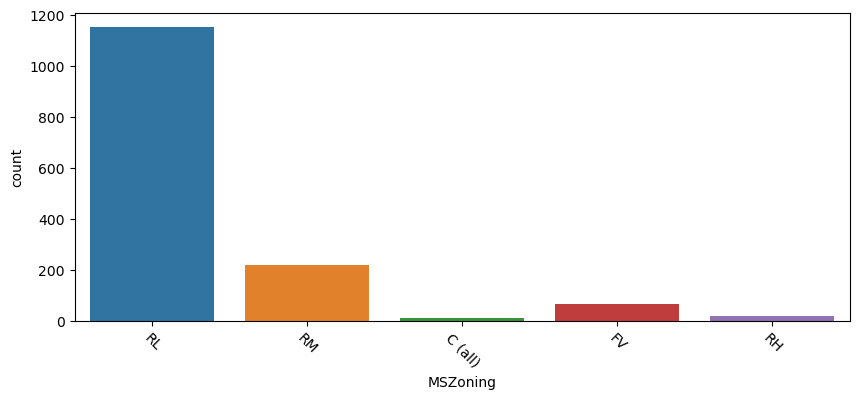

Distribution of Street


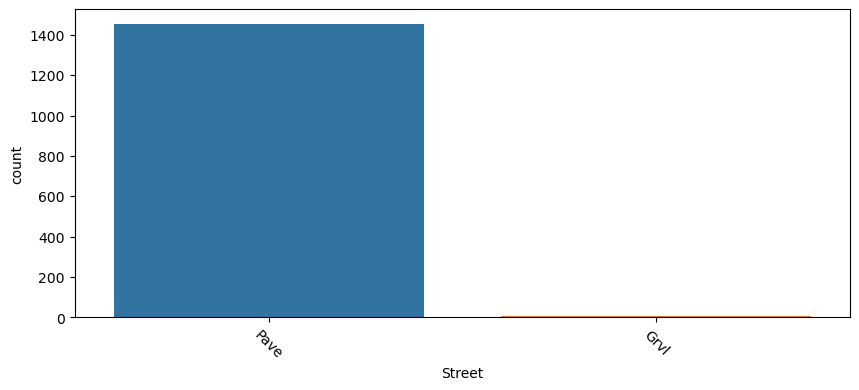

Distribution of Alley


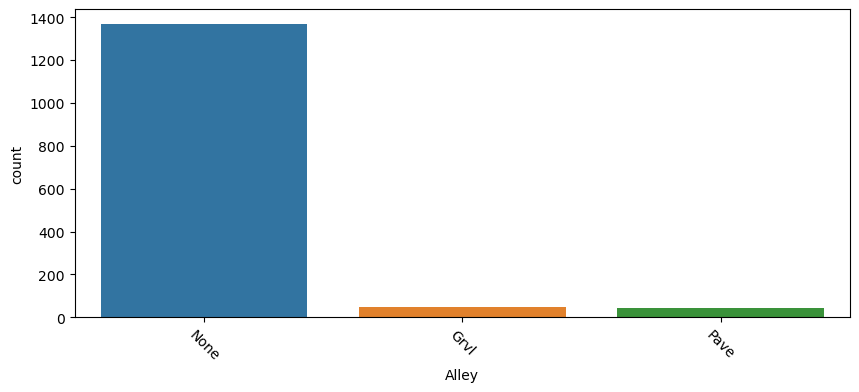

Distribution of LotShape


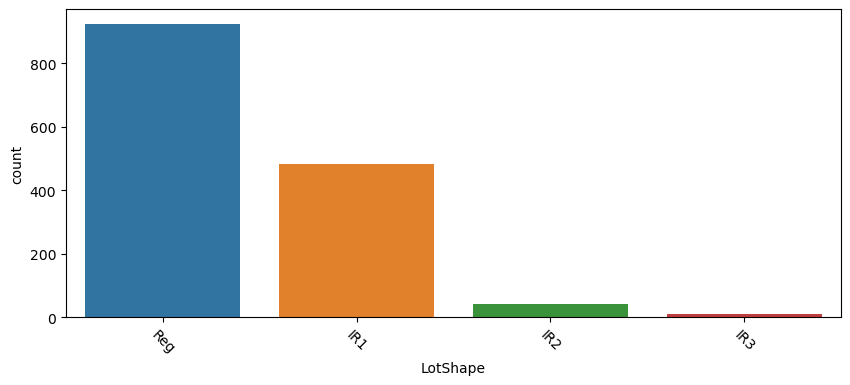

Distribution of LandContour


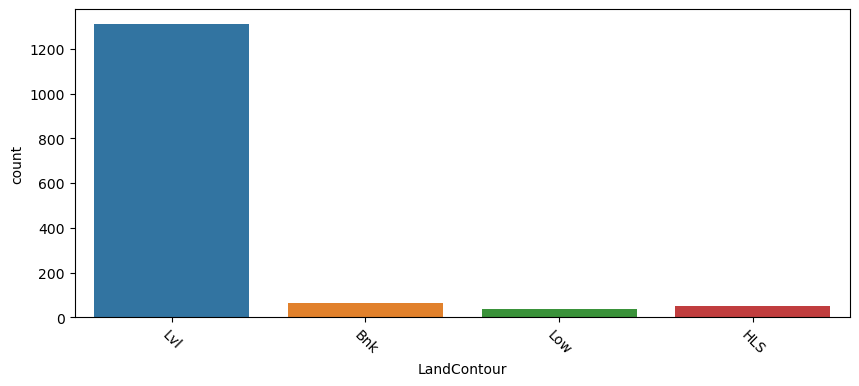

Distribution of Utilities


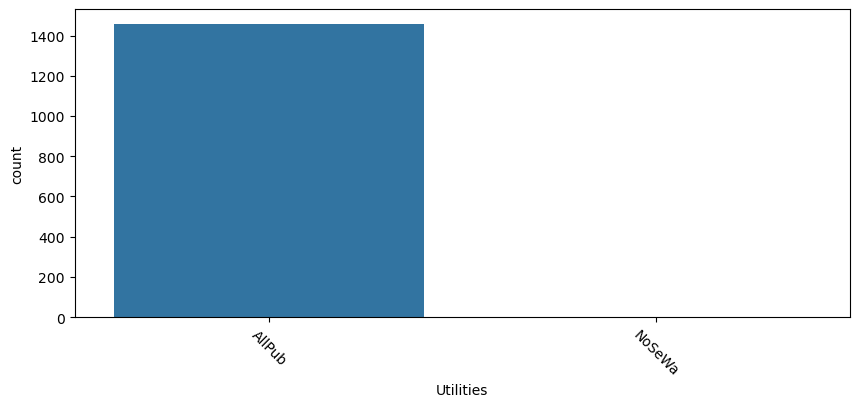

Distribution of LotConfig


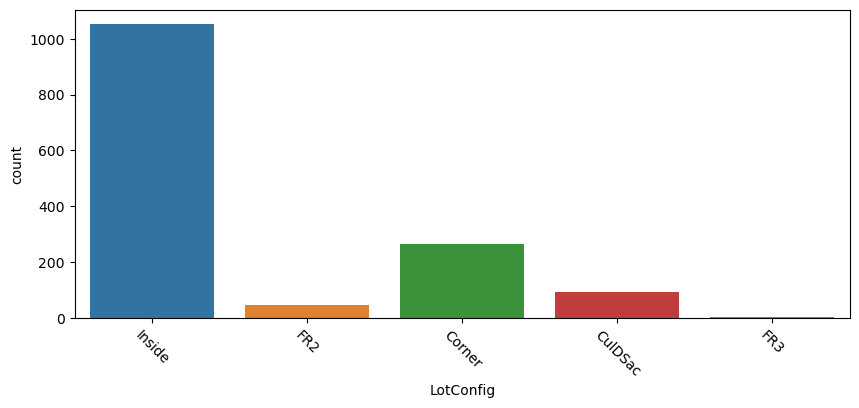

Distribution of LandSlope


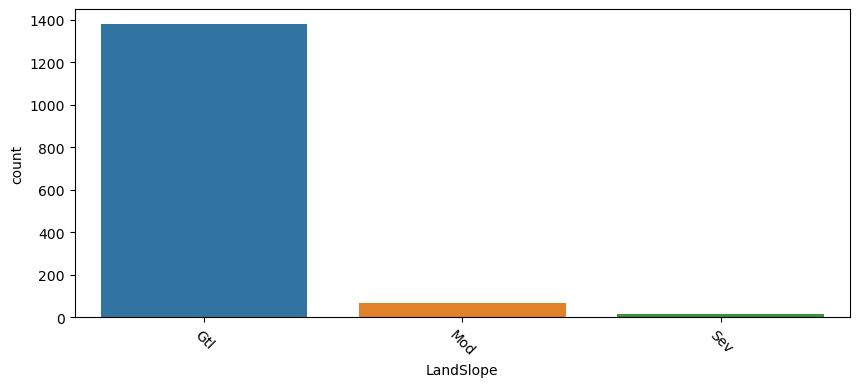

Distribution of Neighborhood


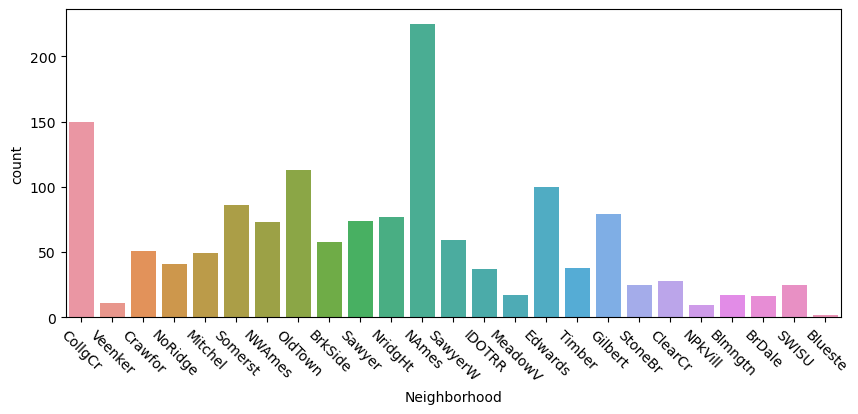

Distribution of Condition1


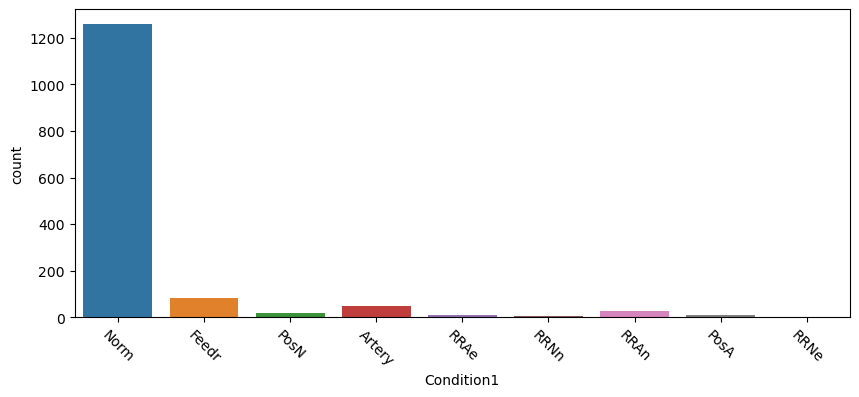

Distribution of Condition2


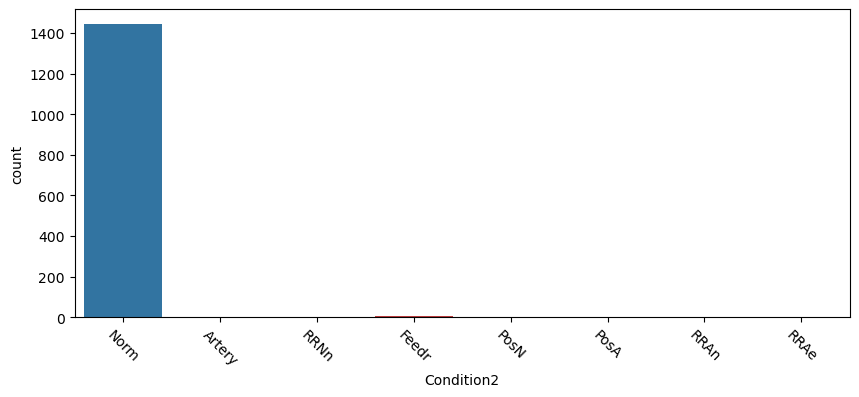

Distribution of BldgType


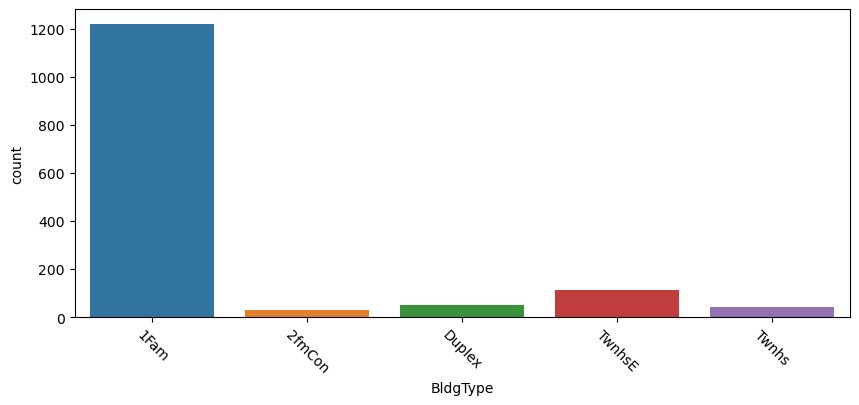

Distribution of HouseStyle


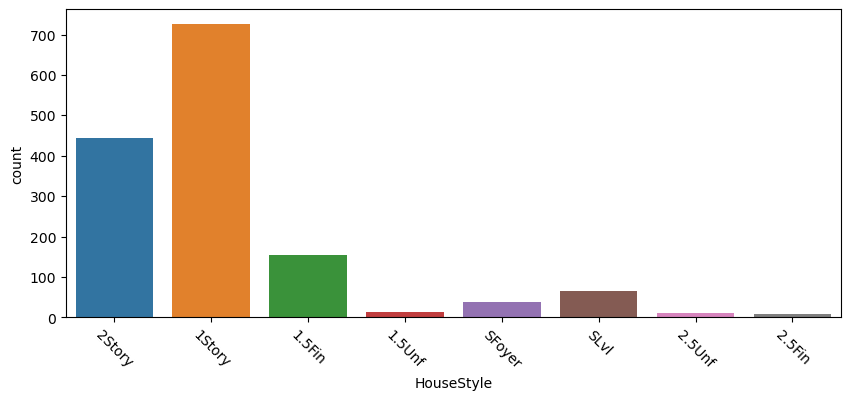

Distribution of RoofStyle


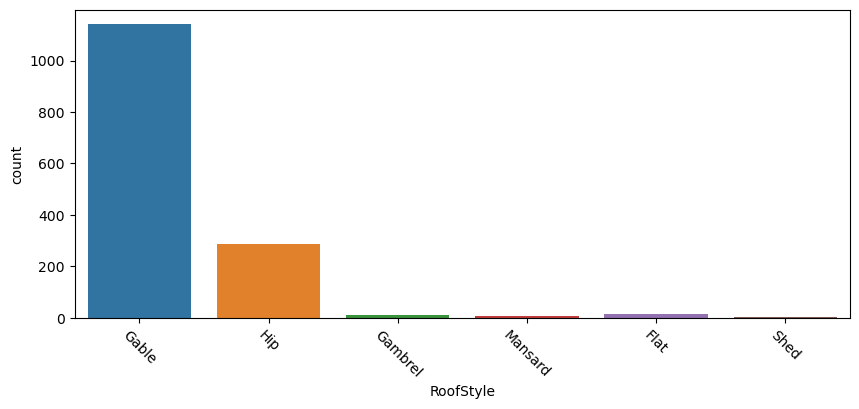

Distribution of RoofMatl


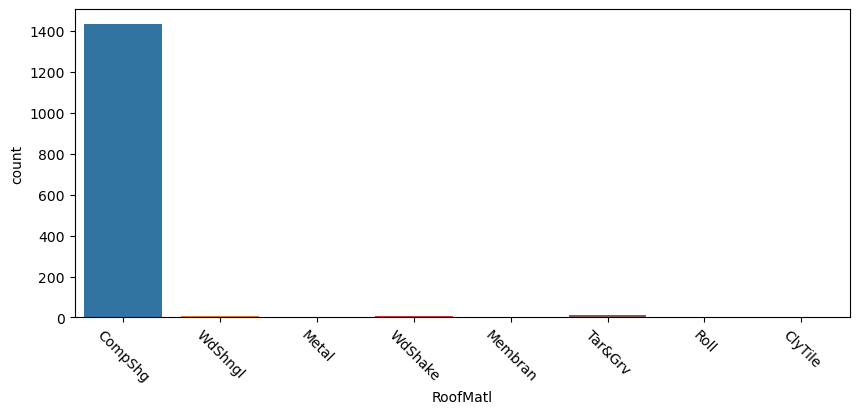

Distribution of Exterior1st


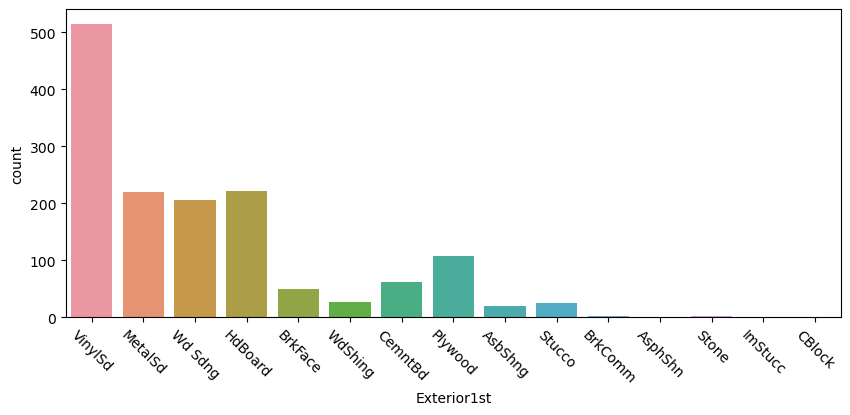

Distribution of Exterior2nd


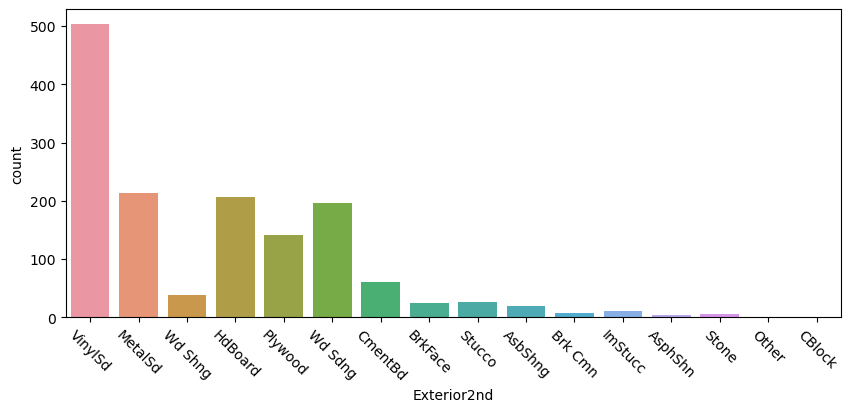

Distribution of MasVnrType


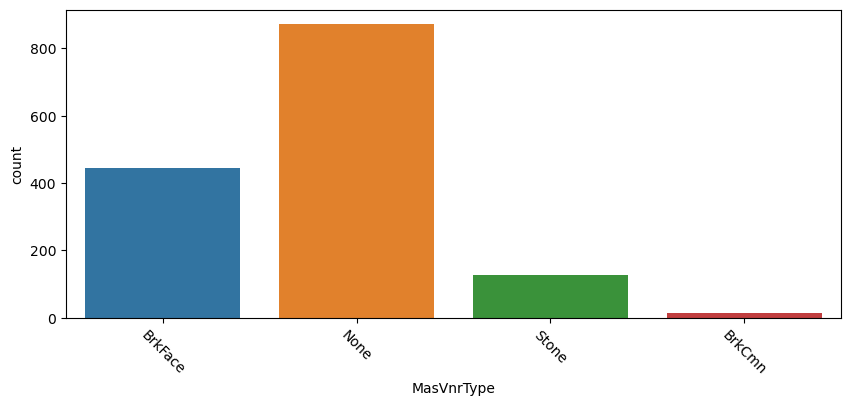

Distribution of ExterQual


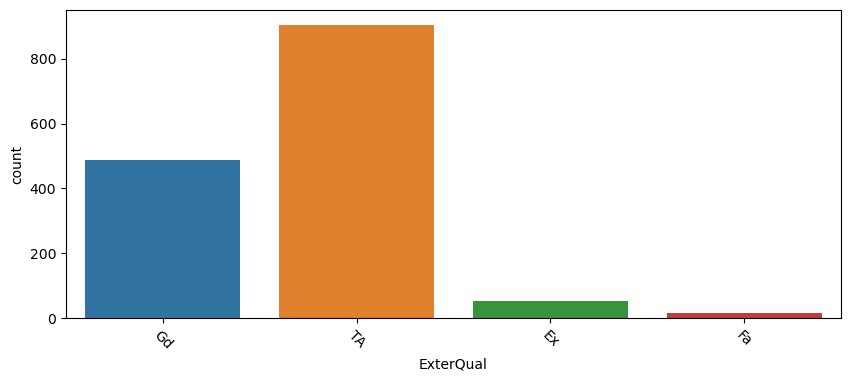

Distribution of ExterCond


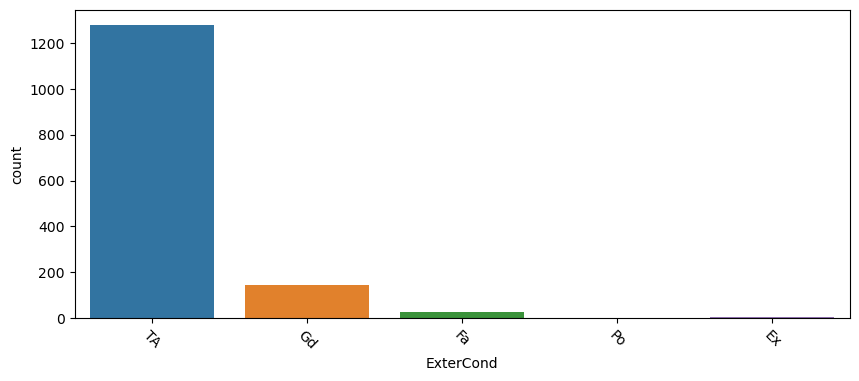

Distribution of Foundation


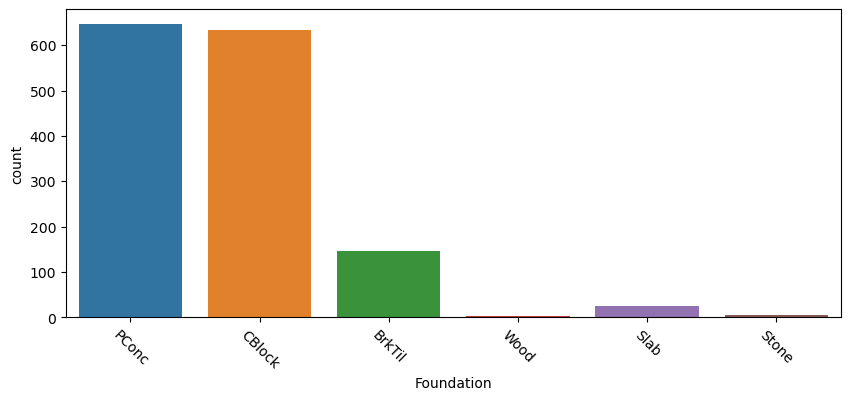

Distribution of BsmtQual


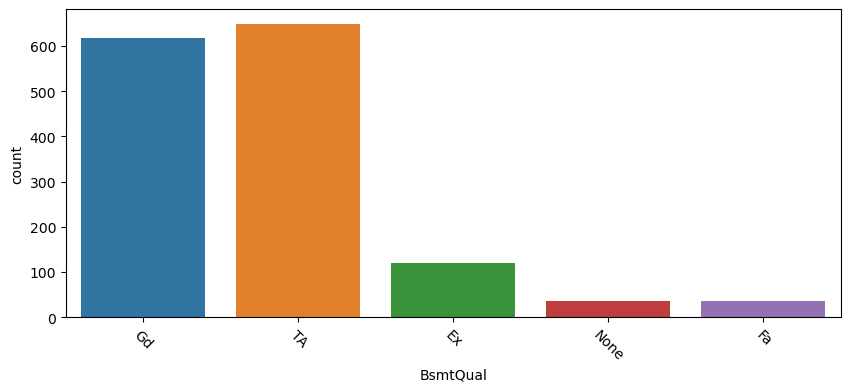

Distribution of BsmtCond


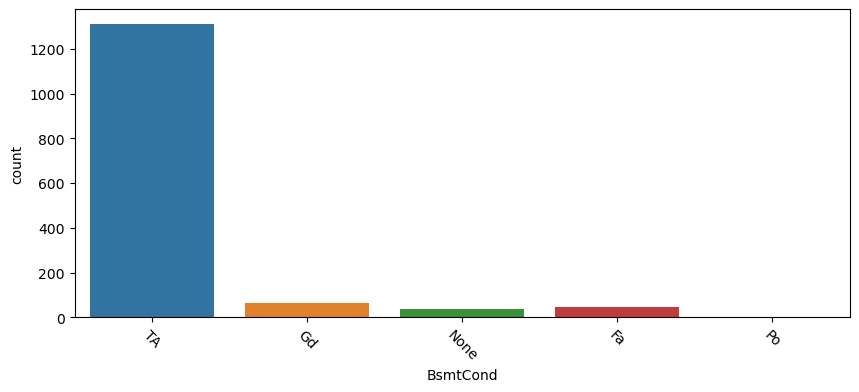

Distribution of BsmtExposure


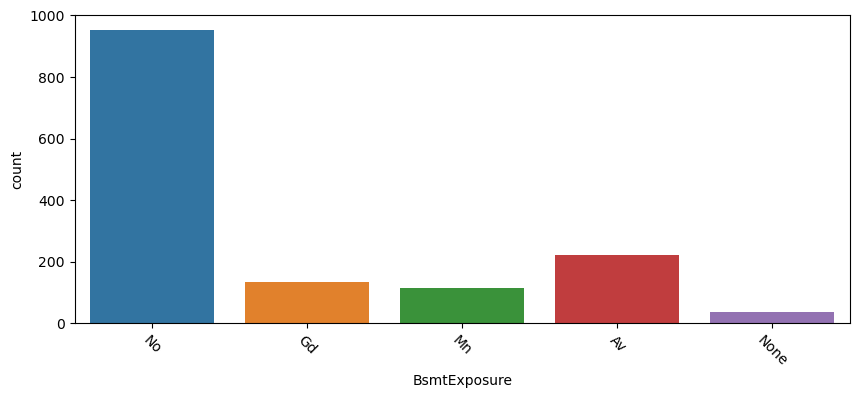

Distribution of BsmtFinType1


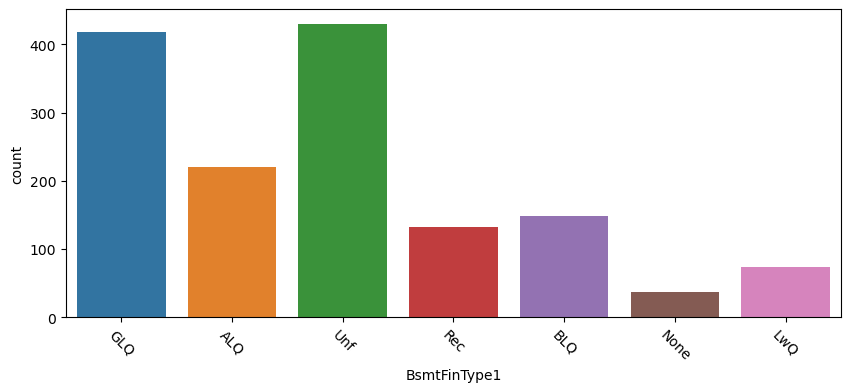

Distribution of BsmtFinType2


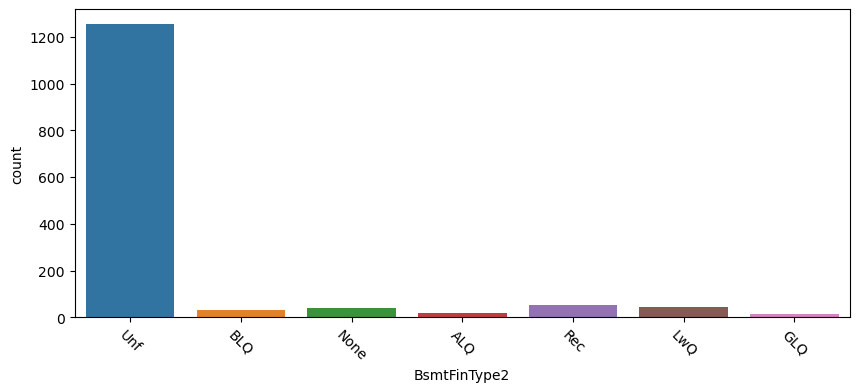

Distribution of Heating


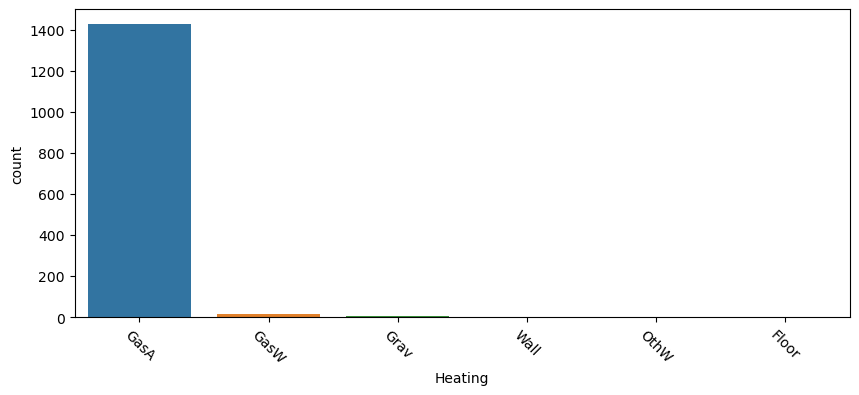

Distribution of HeatingQC


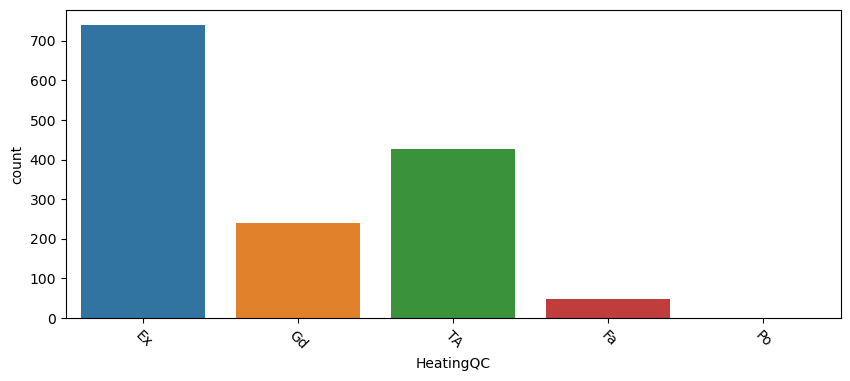

Distribution of CentralAir


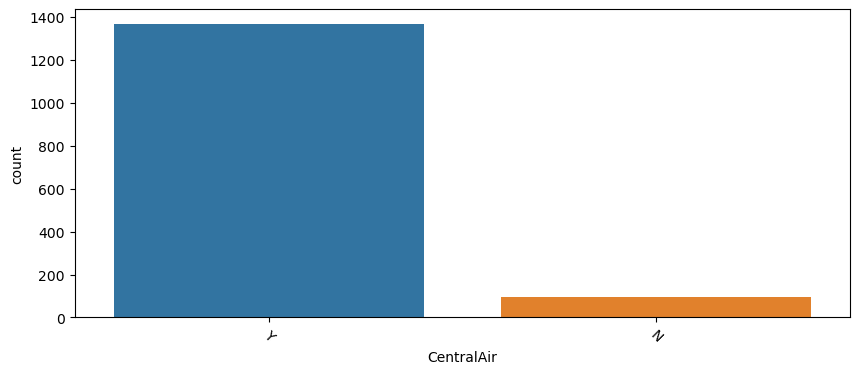

Distribution of Electrical


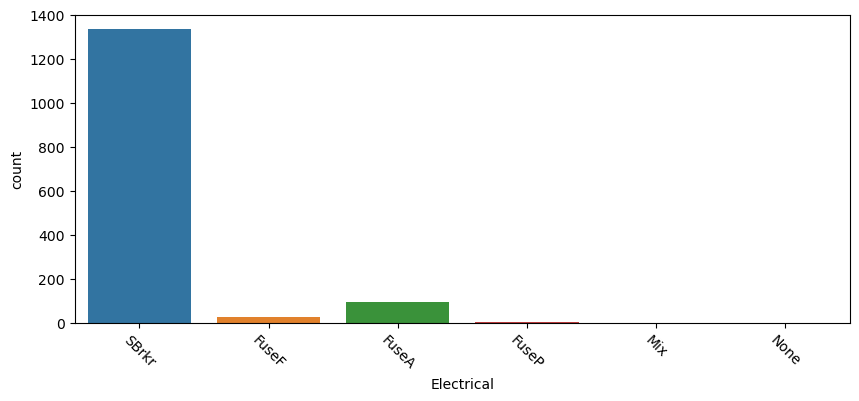

Distribution of KitchenQual


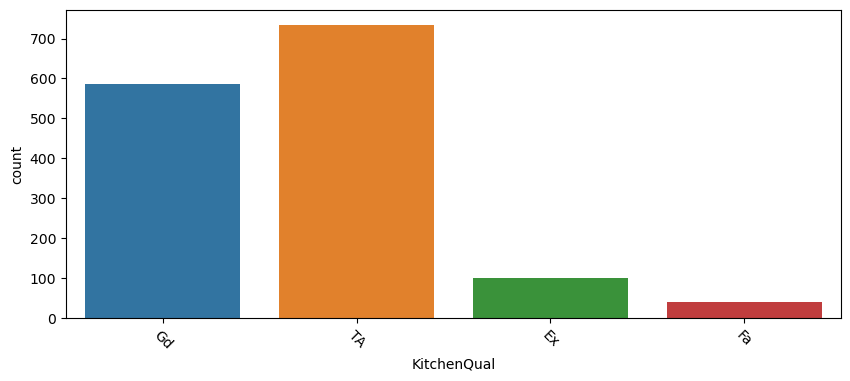

Distribution of Functional


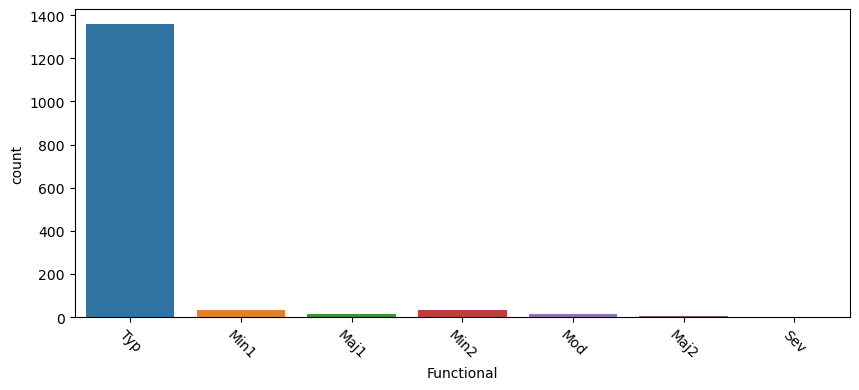

Distribution of FireplaceQu


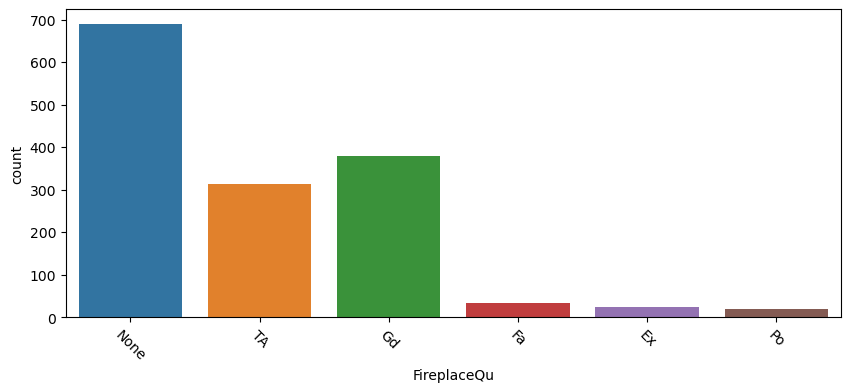

Distribution of GarageType


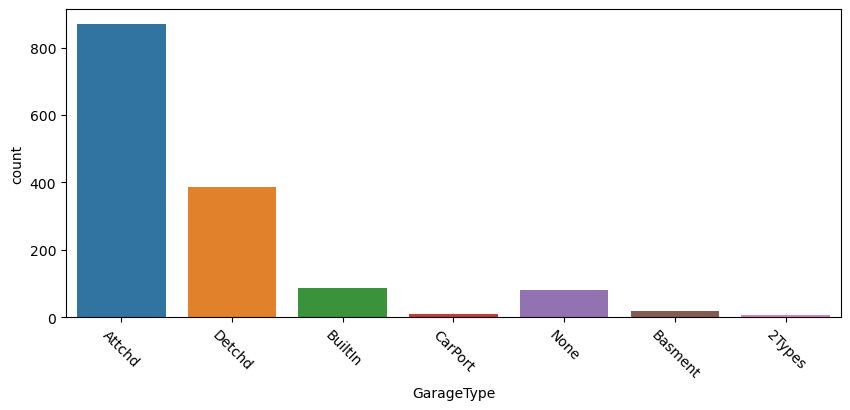

Distribution of GarageFinish


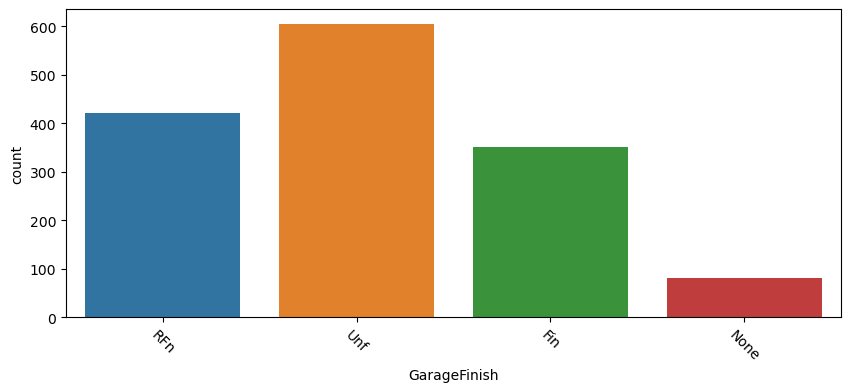

Distribution of GarageQual


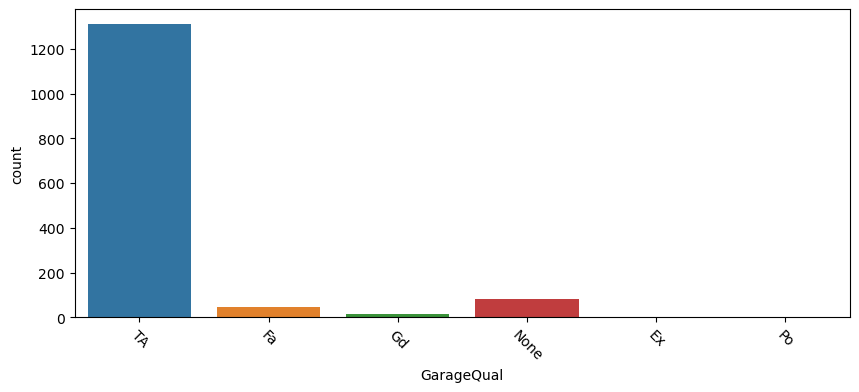

Distribution of GarageCond


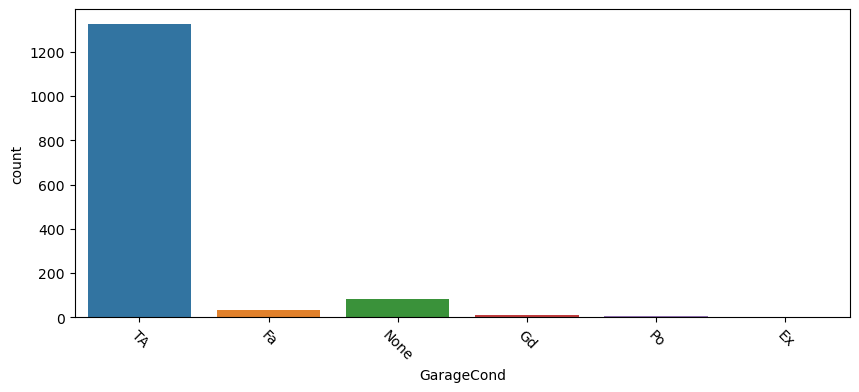

Distribution of PavedDrive


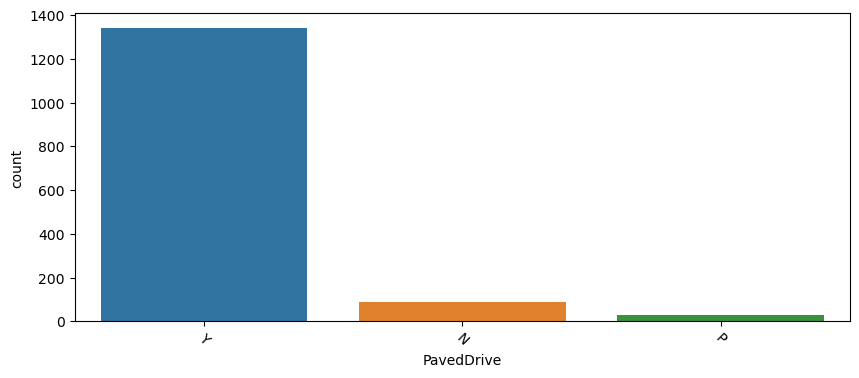

Distribution of PoolQC


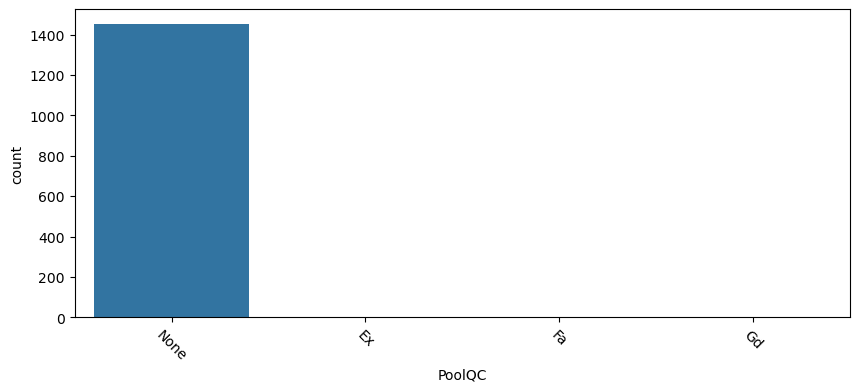

Distribution of Fence


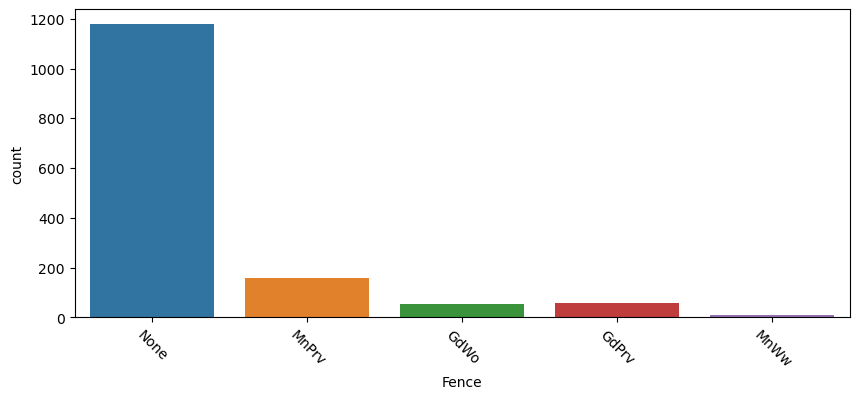

Distribution of MiscFeature


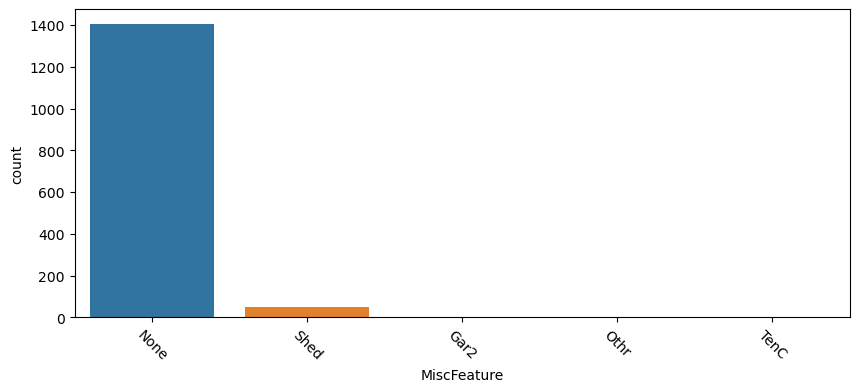

Distribution of SaleType


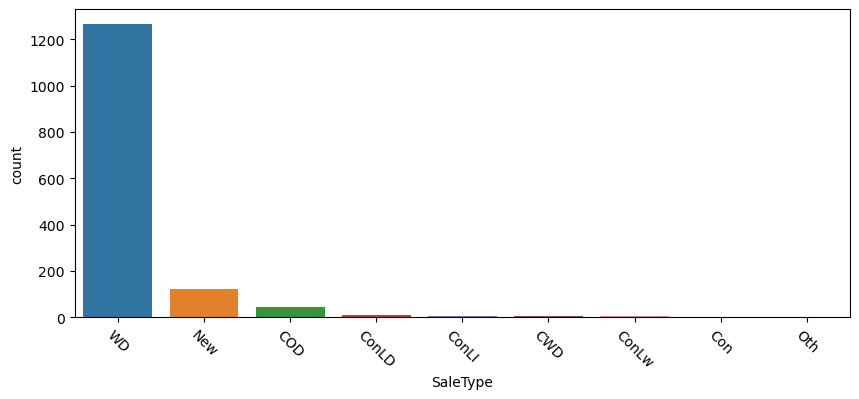

Distribution of SaleCondition


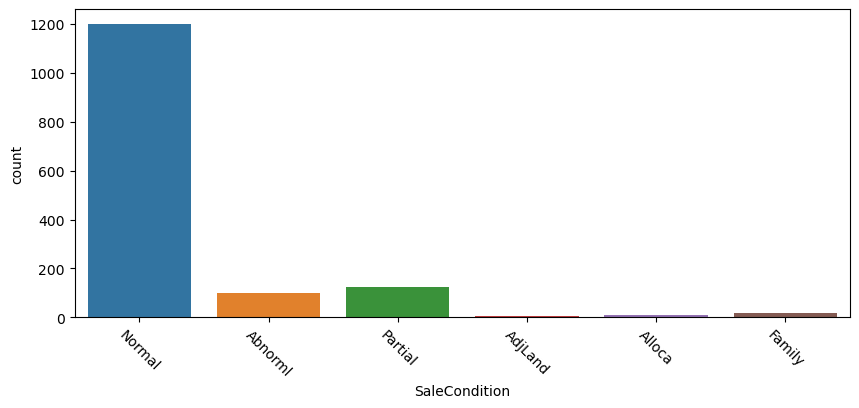

In [21]:
#let's analyse categorical variable
for i in object_columns:
    print('Distribution of',i)
    plt.figure(figsize=(10,4))
    sns.countplot(data[i],data=data)
    plt.xticks(rotation=-45)
    plt.show()

Box Plot of: Id


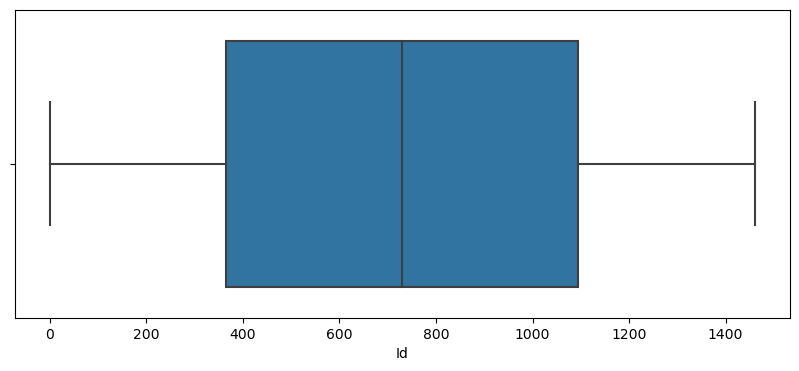

Box Plot of: MSSubClass


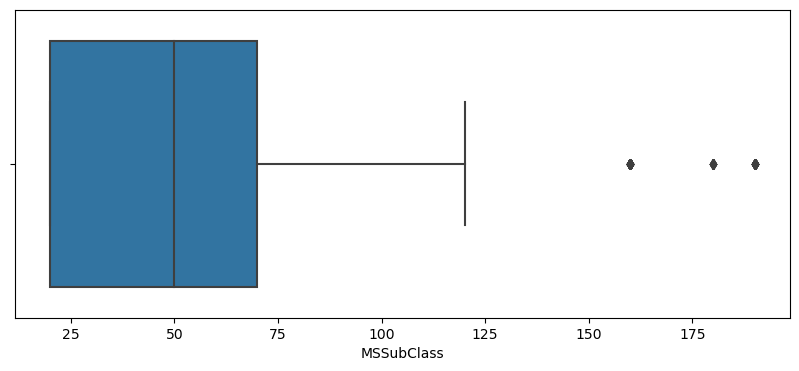

Box Plot of: LotFrontage


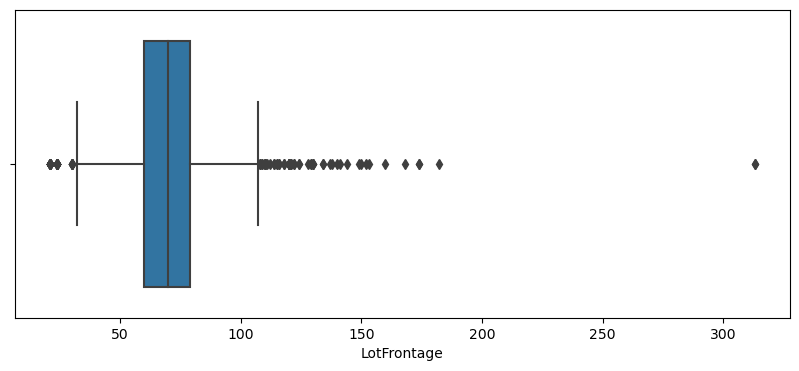

Box Plot of: LotArea


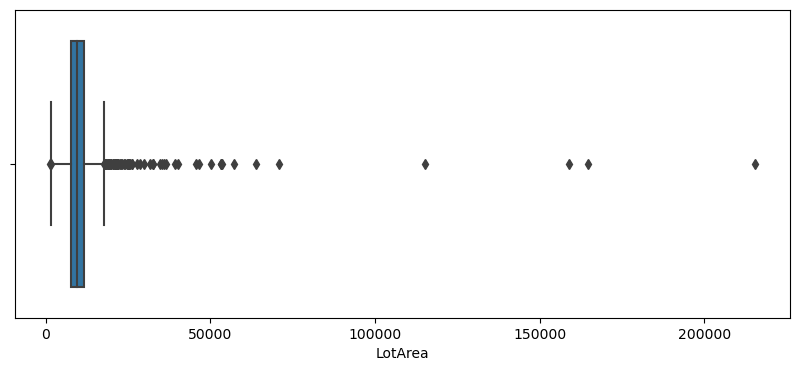

Box Plot of: OverallQual


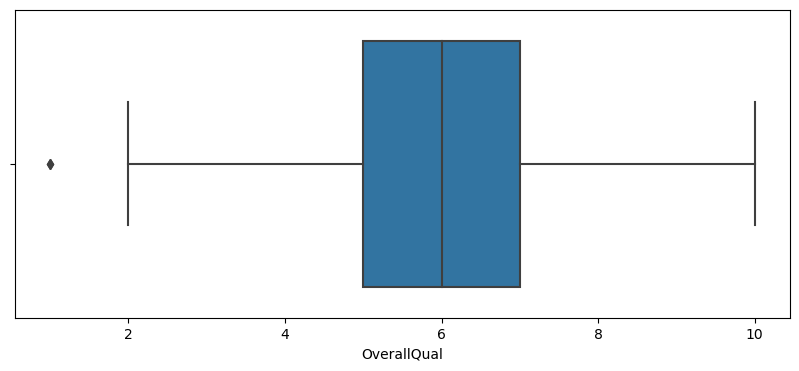

Box Plot of: OverallCond


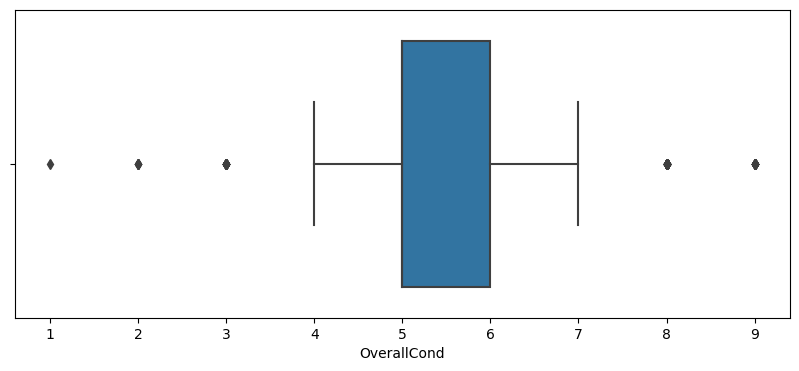

Box Plot of: YearBuilt


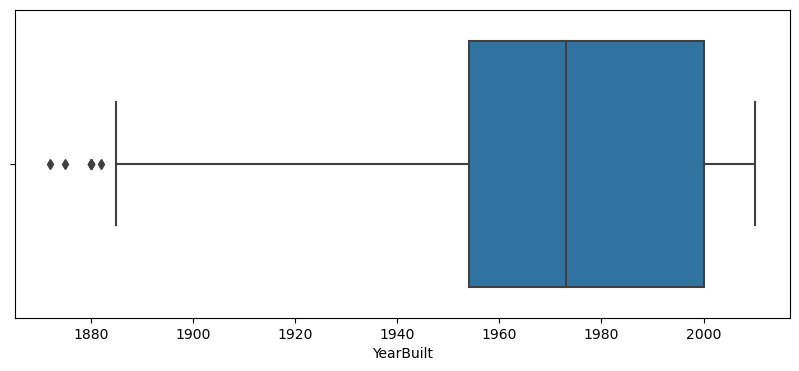

Box Plot of: YearRemodAdd


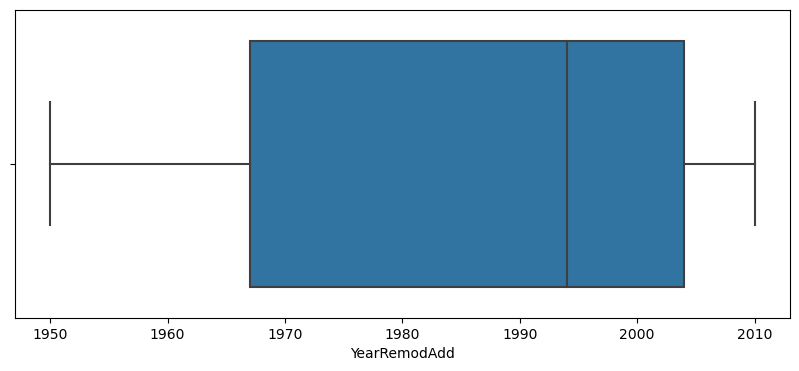

Box Plot of: MasVnrArea


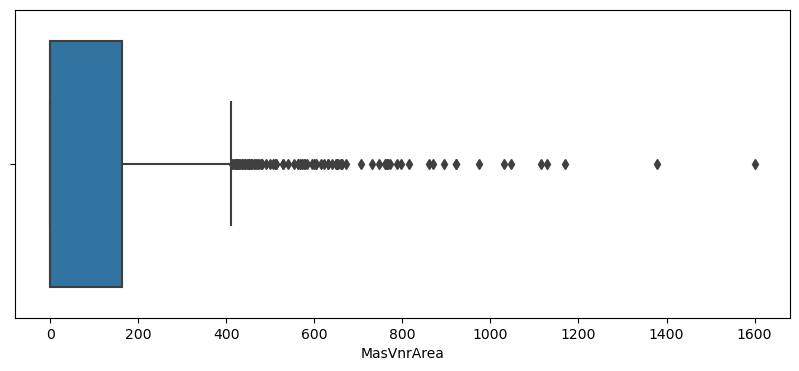

Box Plot of: BsmtFinSF1


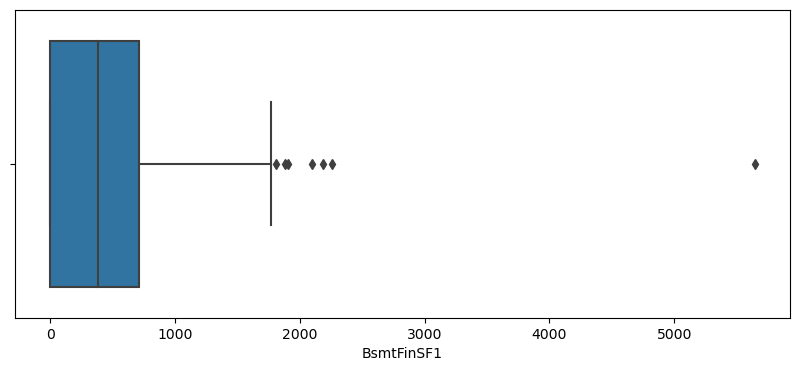

Box Plot of: BsmtFinSF2


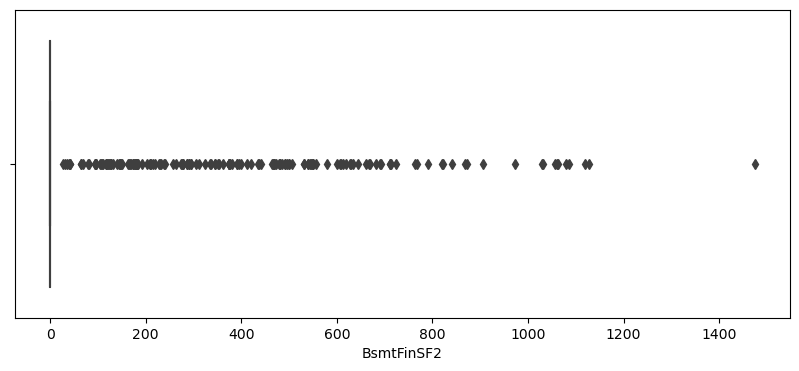

Box Plot of: BsmtUnfSF


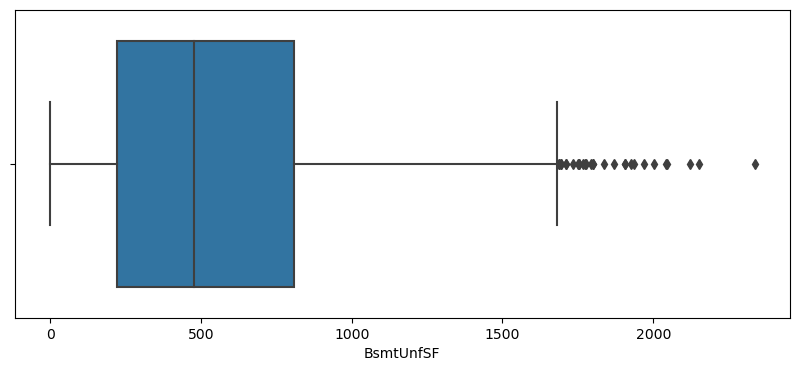

Box Plot of: TotalBsmtSF


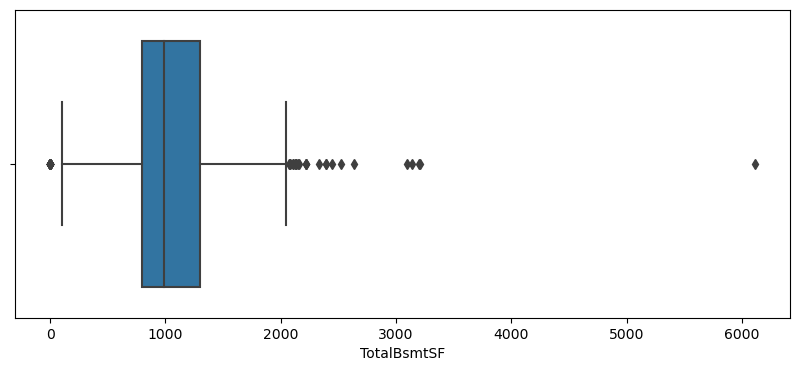

Box Plot of: 1stFlrSF


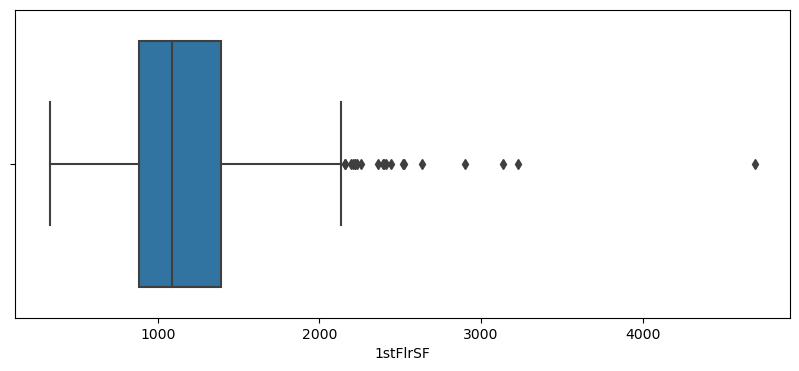

Box Plot of: 2ndFlrSF


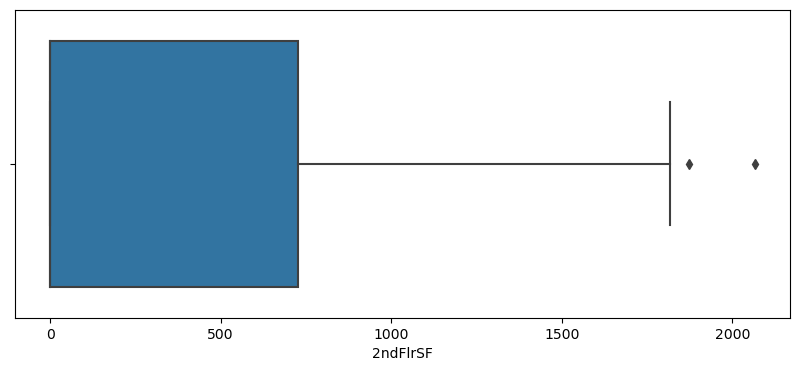

Box Plot of: LowQualFinSF


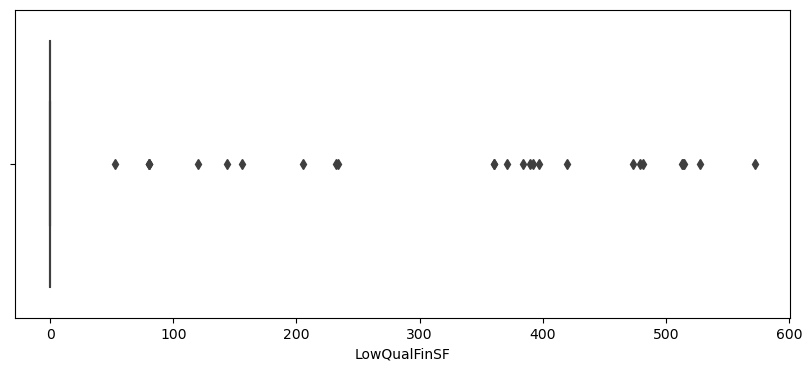

Box Plot of: GrLivArea


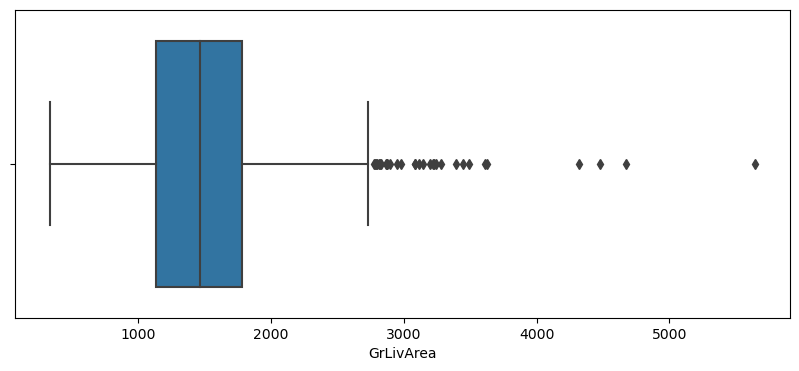

Box Plot of: BsmtFullBath


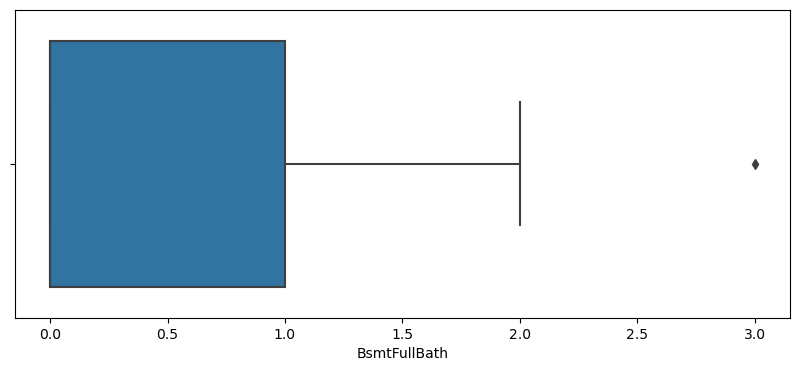

Box Plot of: BsmtHalfBath


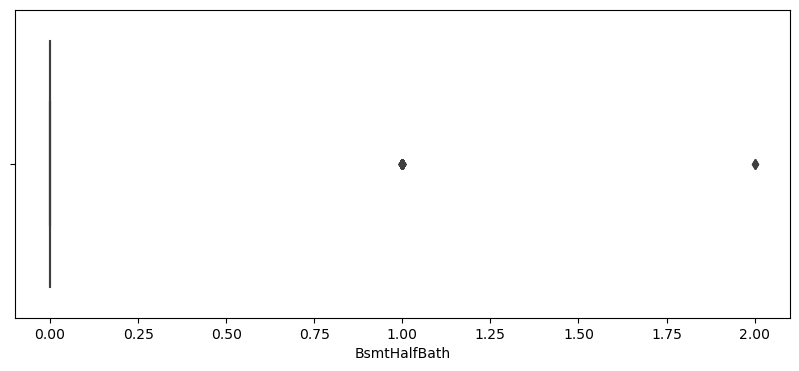

Box Plot of: FullBath


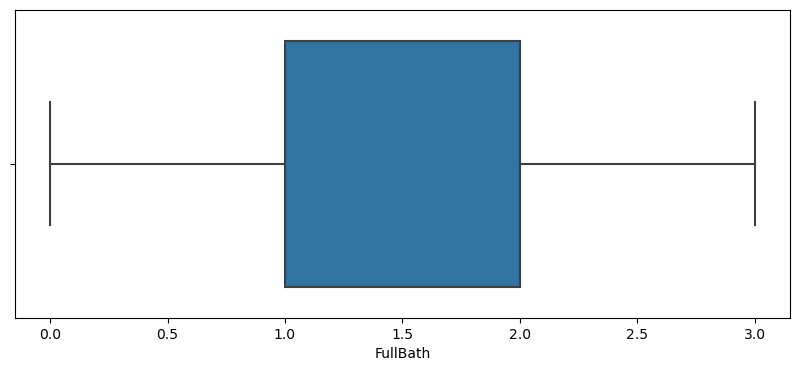

Box Plot of: HalfBath


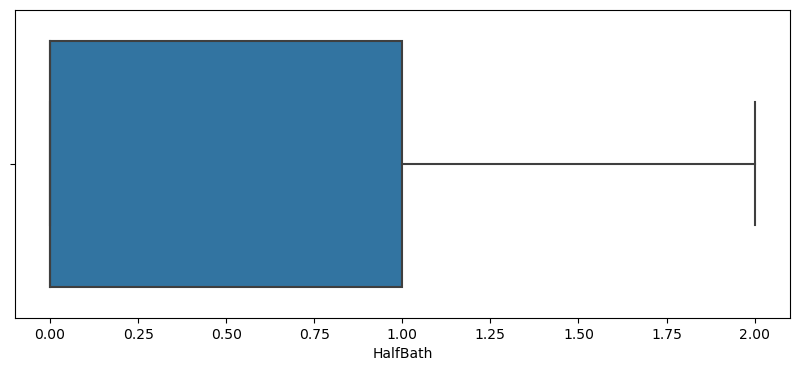

Box Plot of: BedroomAbvGr


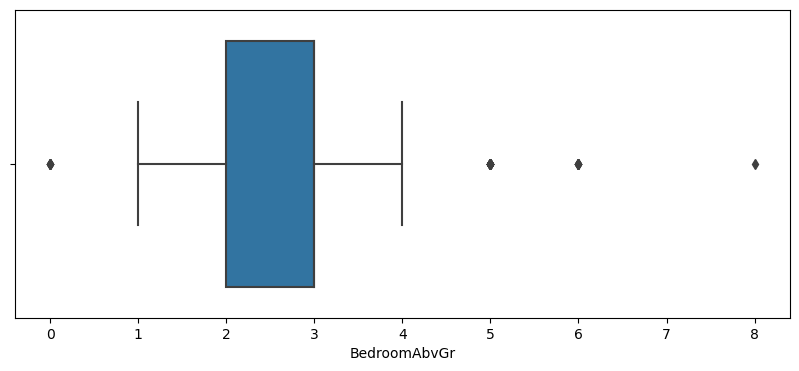

Box Plot of: KitchenAbvGr


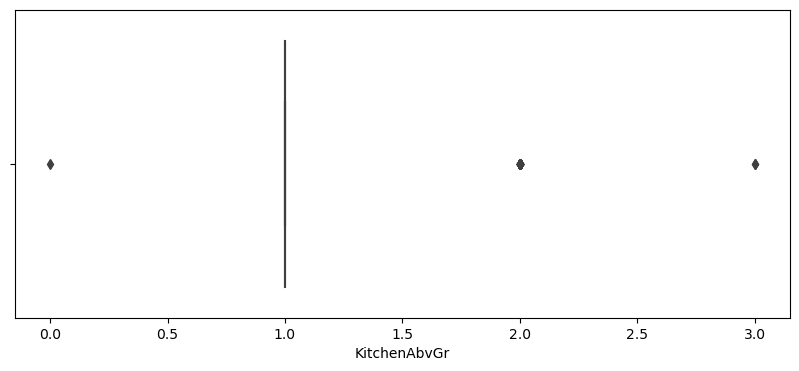

Box Plot of: TotRmsAbvGrd


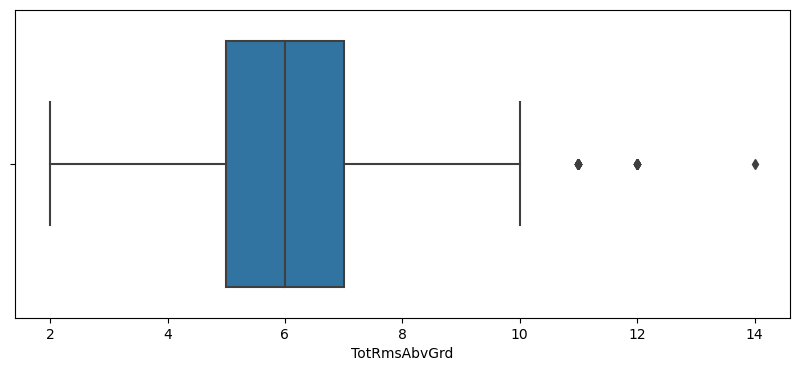

Box Plot of: Fireplaces


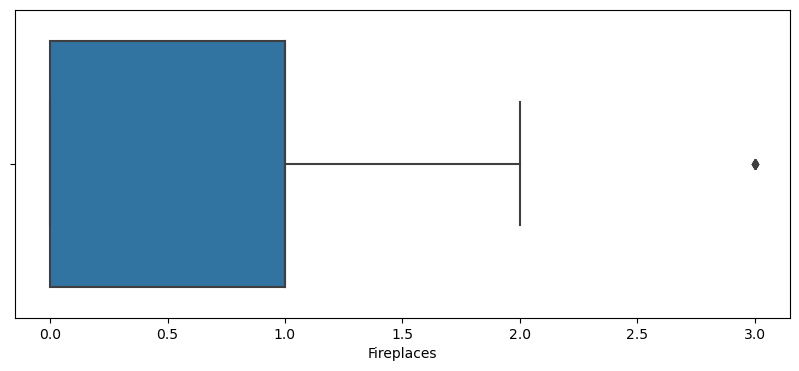

Box Plot of: GarageYrBlt


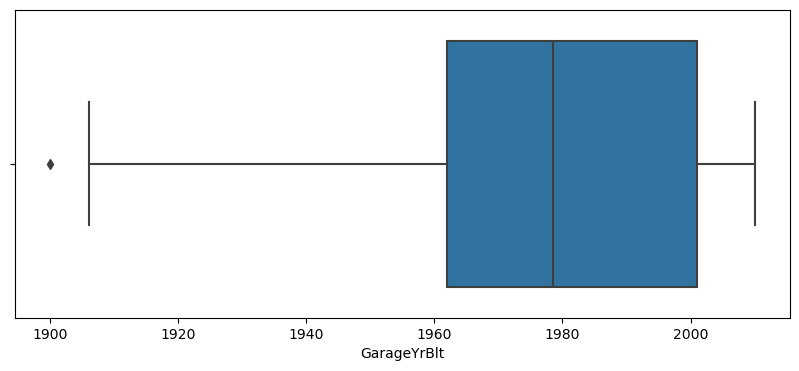

Box Plot of: GarageCars


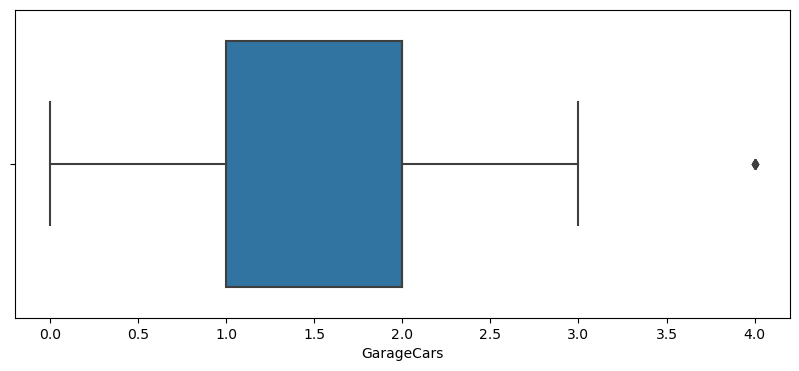

Box Plot of: GarageArea


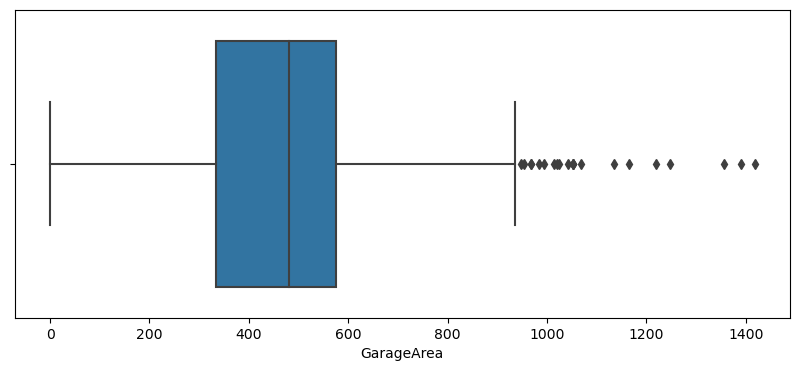

Box Plot of: WoodDeckSF


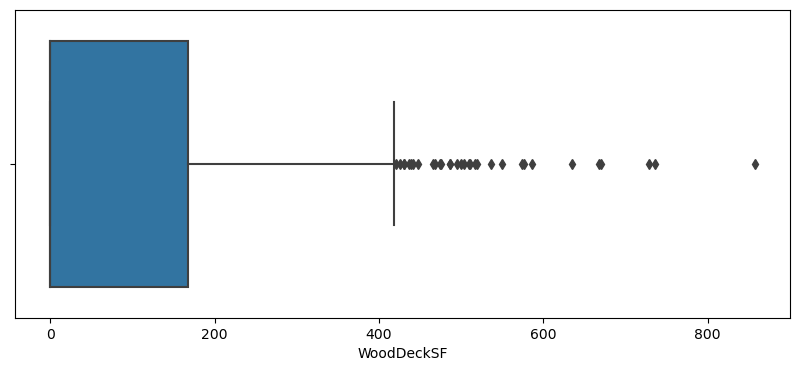

Box Plot of: OpenPorchSF


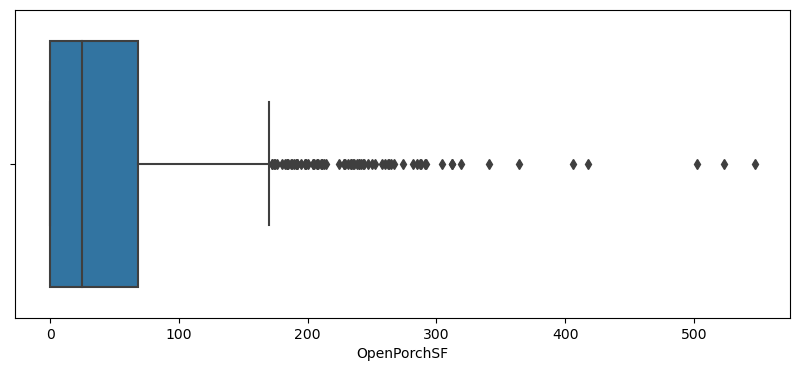

Box Plot of: EnclosedPorch


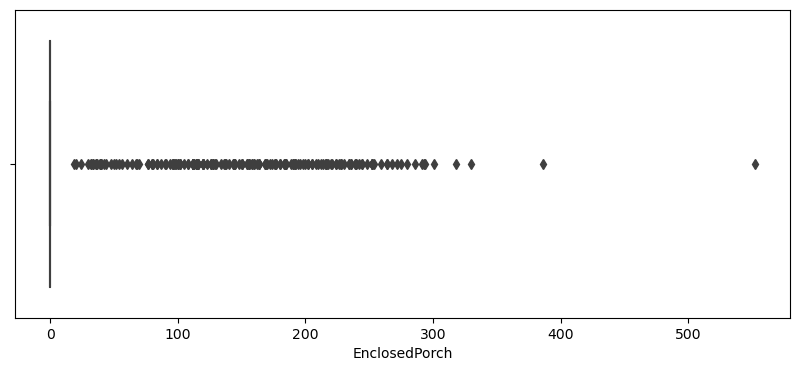

Box Plot of: 3SsnPorch


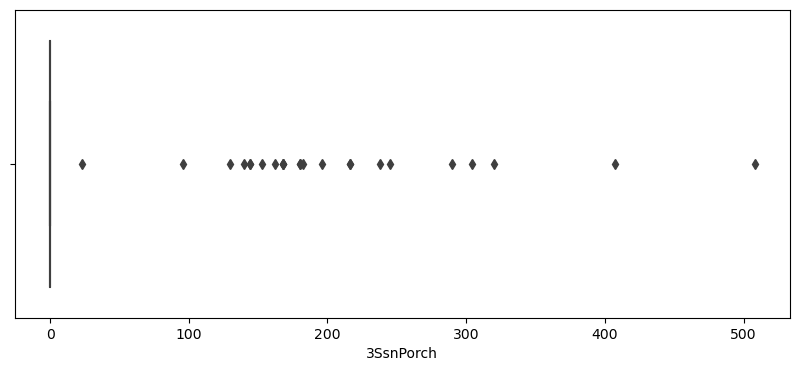

Box Plot of: ScreenPorch


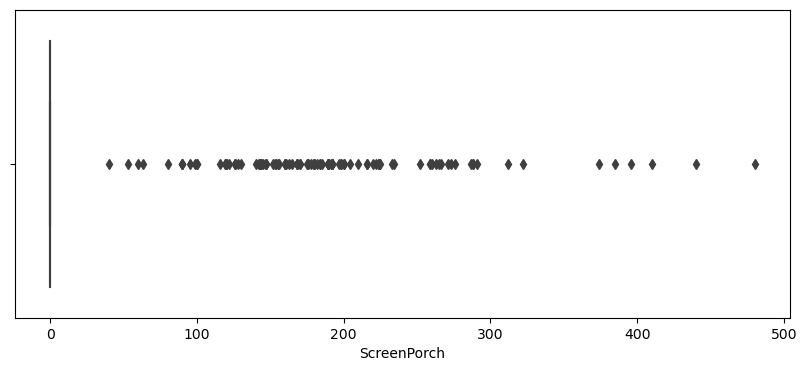

Box Plot of: PoolArea


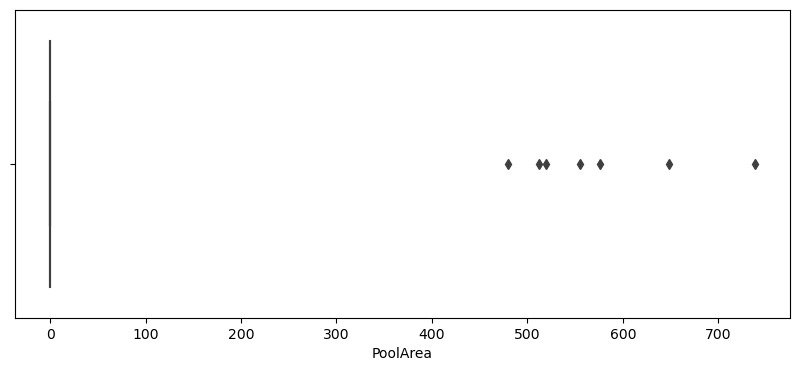

Box Plot of: MiscVal


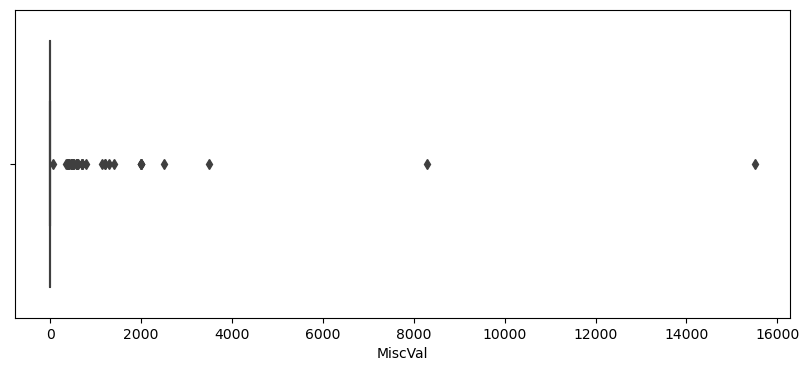

Box Plot of: MoSold


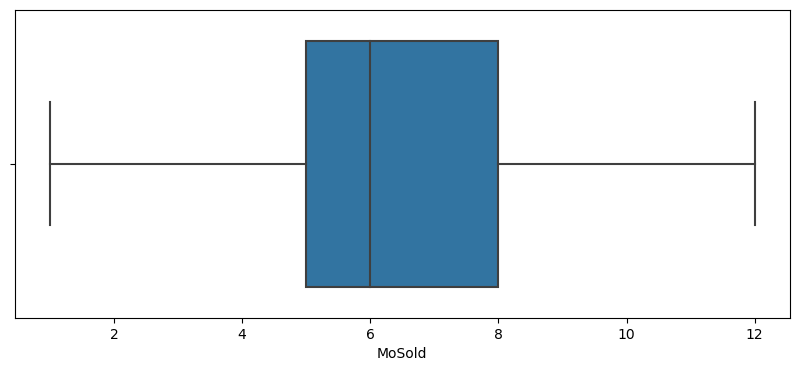

Box Plot of: YrSold


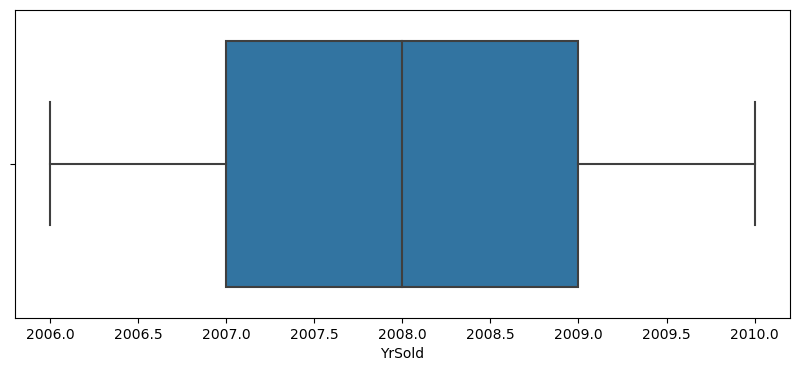

Box Plot of: SalePrice


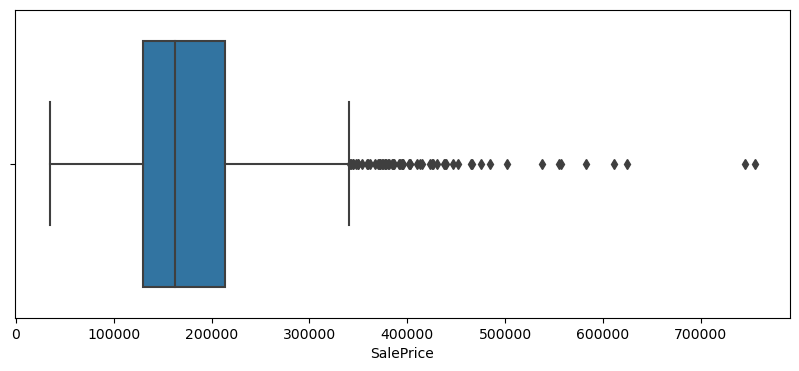

In [22]:
#let's analyse numerical variables
for i in numericals_columns:
    print('Box Plot of:',i)
    plt.figure(figsize=(10,4))
    sns.boxplot(data[i],orient='vertical')
    plt.show()

* For many numerical variables, there are many outliers present so it should be removed.

KDE plot of: Id


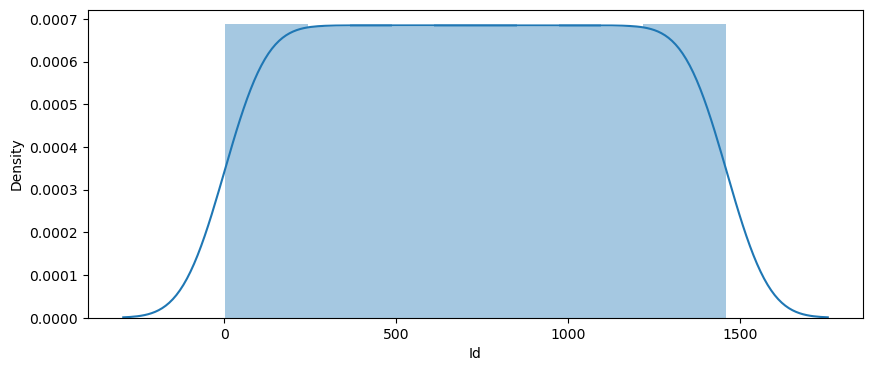

KDE plot of: MSSubClass


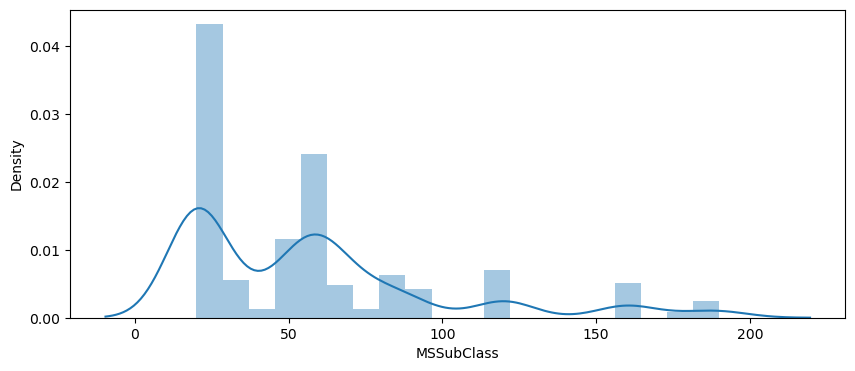

KDE plot of: LotFrontage


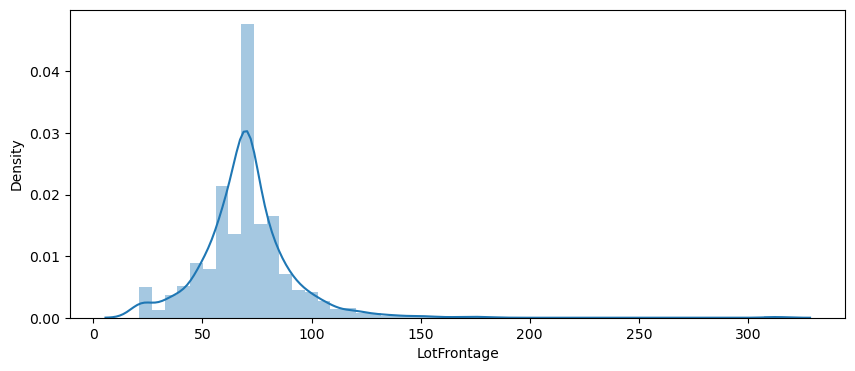

KDE plot of: LotArea


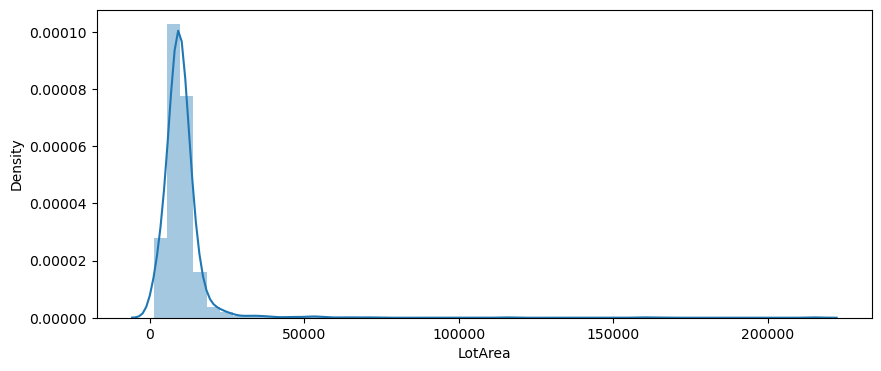

KDE plot of: OverallQual


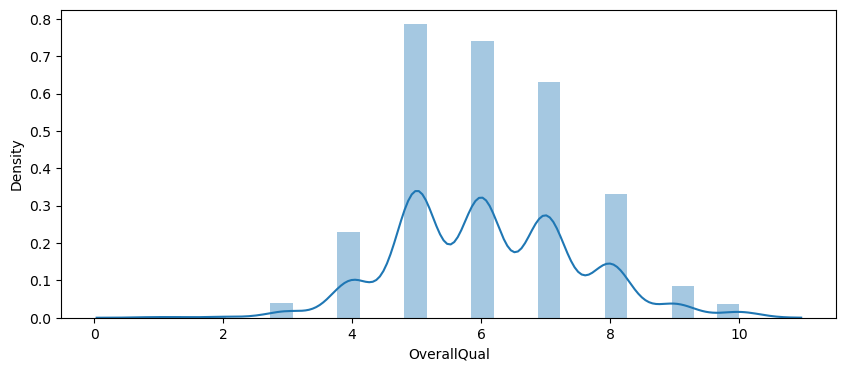

KDE plot of: OverallCond


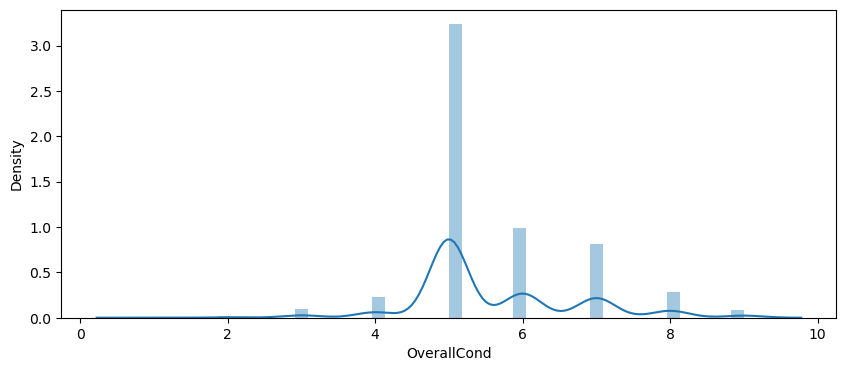

KDE plot of: YearBuilt


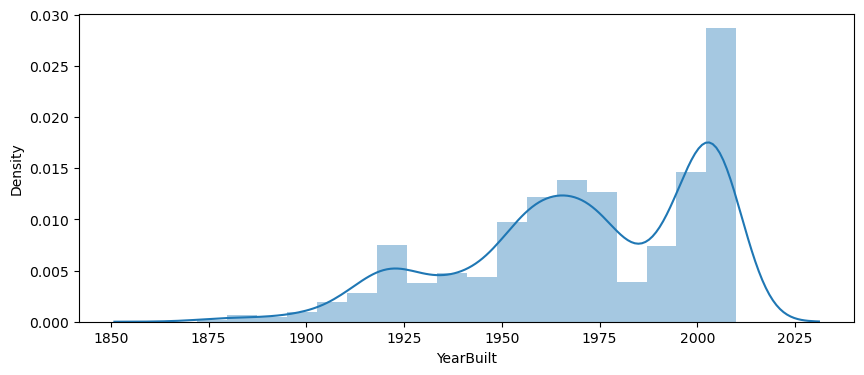

KDE plot of: YearRemodAdd


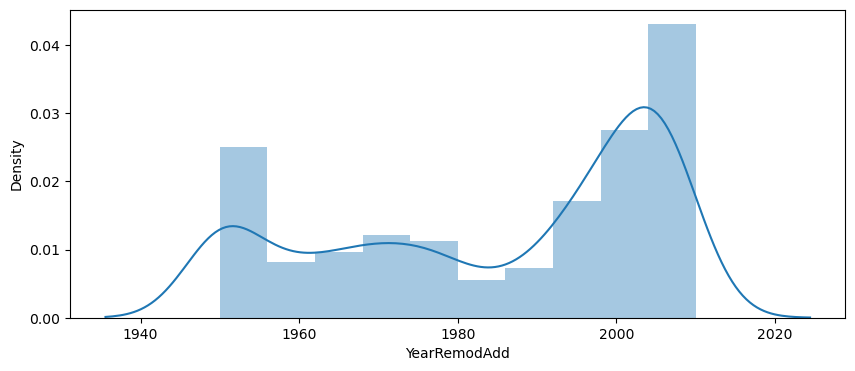

KDE plot of: MasVnrArea


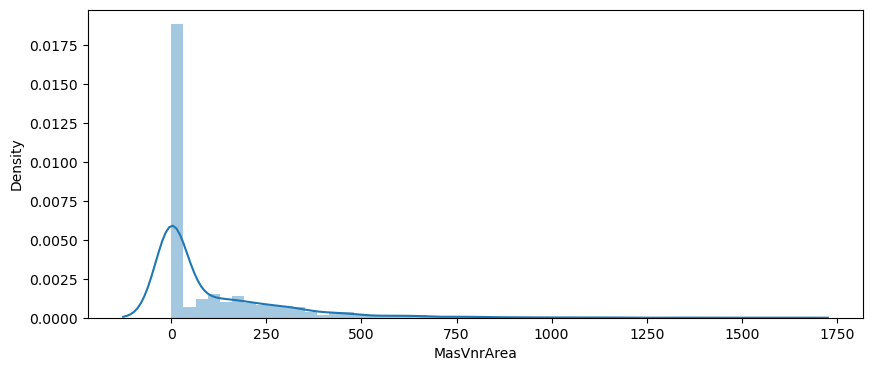

KDE plot of: BsmtFinSF1


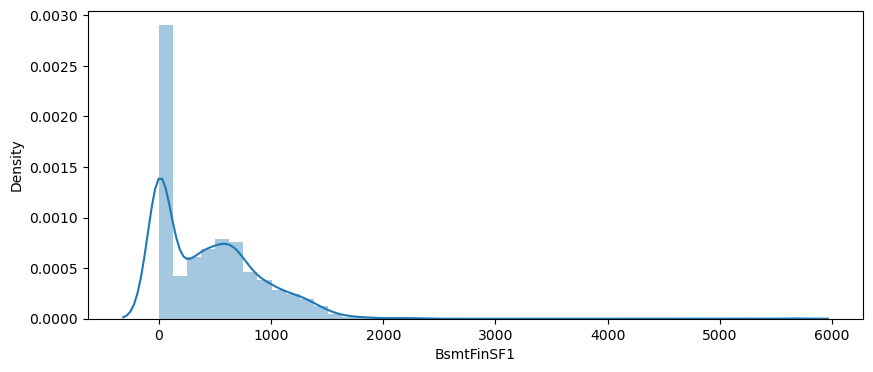

KDE plot of: BsmtFinSF2


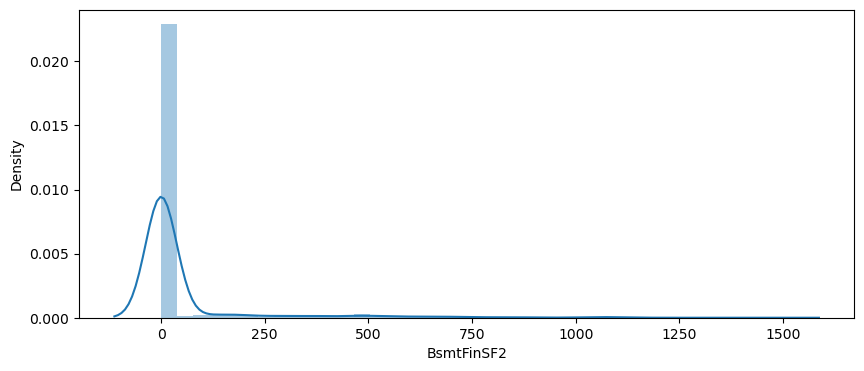

KDE plot of: BsmtUnfSF


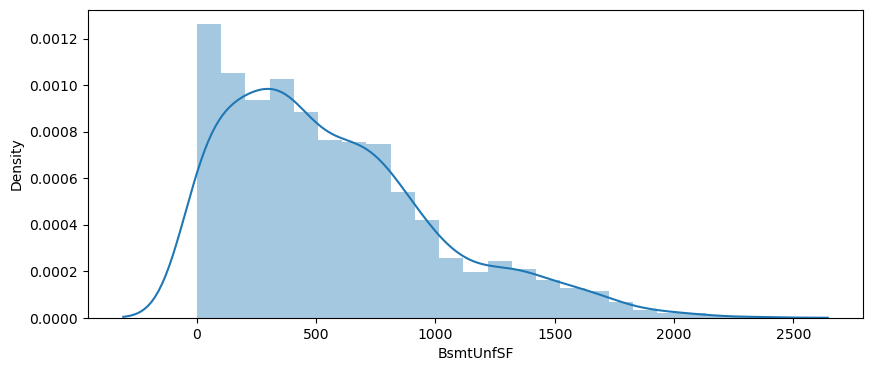

KDE plot of: TotalBsmtSF


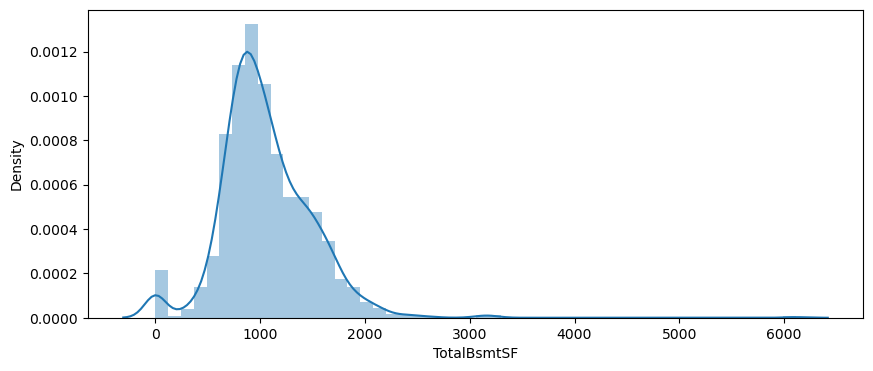

KDE plot of: 1stFlrSF


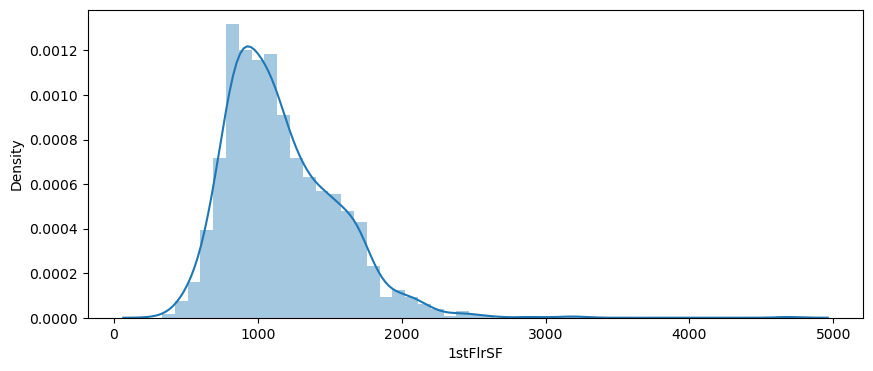

KDE plot of: 2ndFlrSF


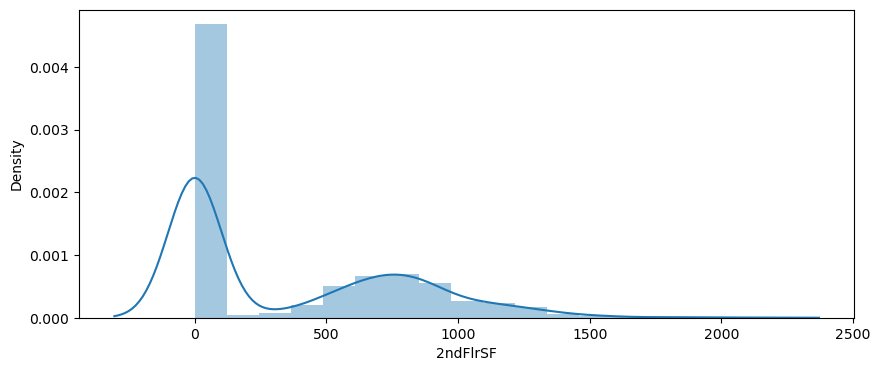

KDE plot of: LowQualFinSF


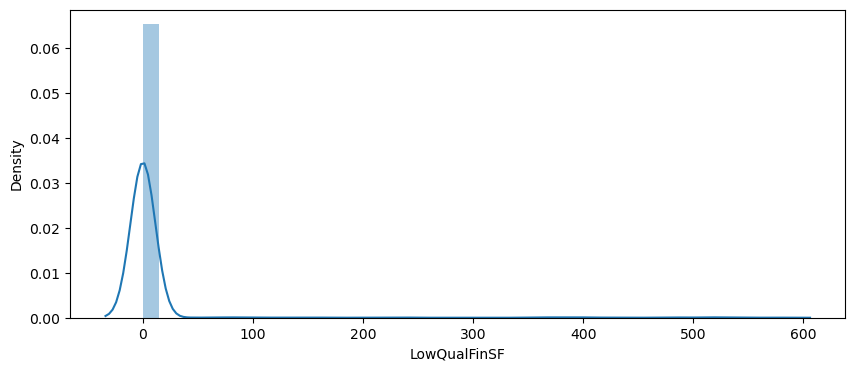

KDE plot of: GrLivArea


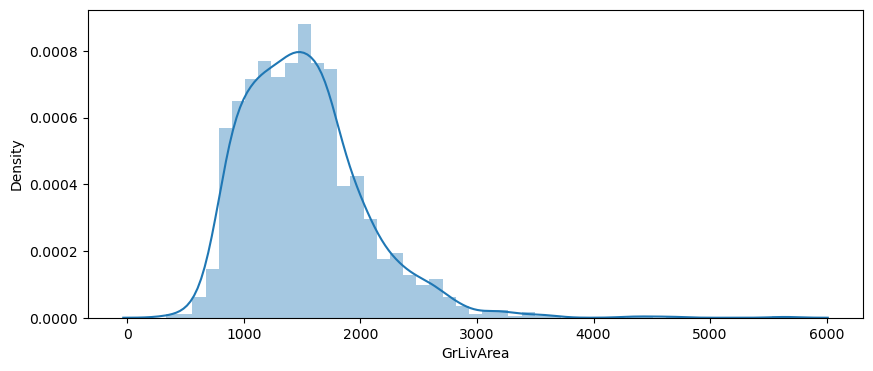

KDE plot of: BsmtFullBath


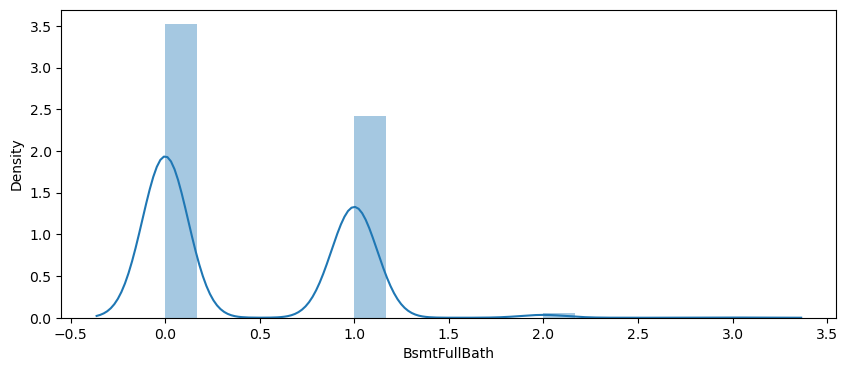

KDE plot of: BsmtHalfBath


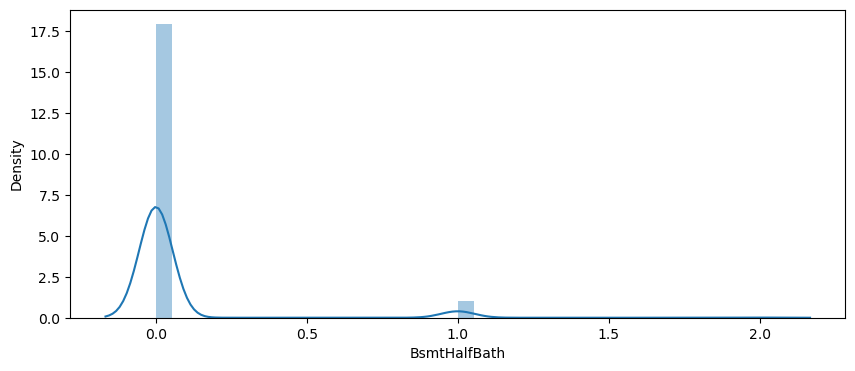

KDE plot of: FullBath


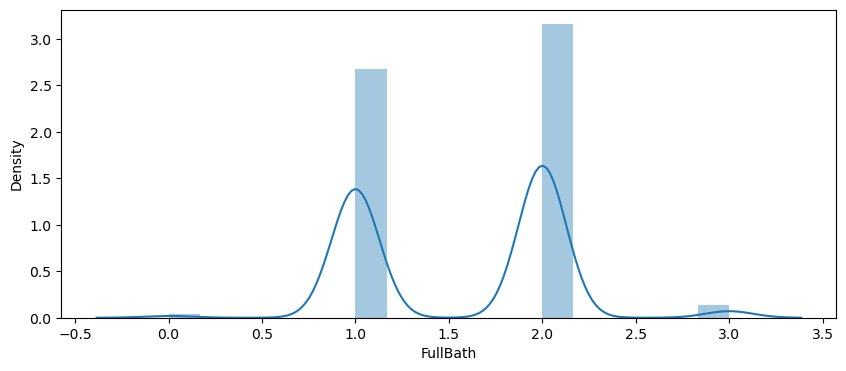

KDE plot of: HalfBath


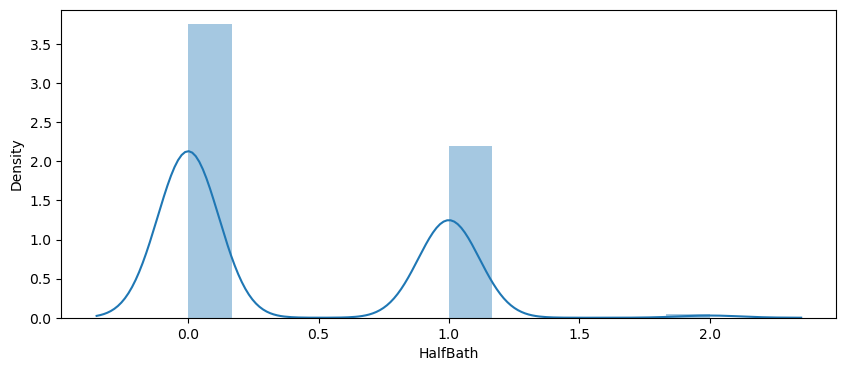

KDE plot of: BedroomAbvGr


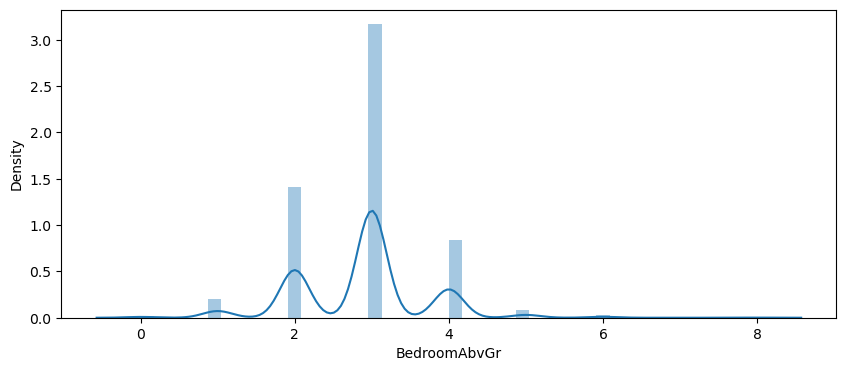

KDE plot of: KitchenAbvGr


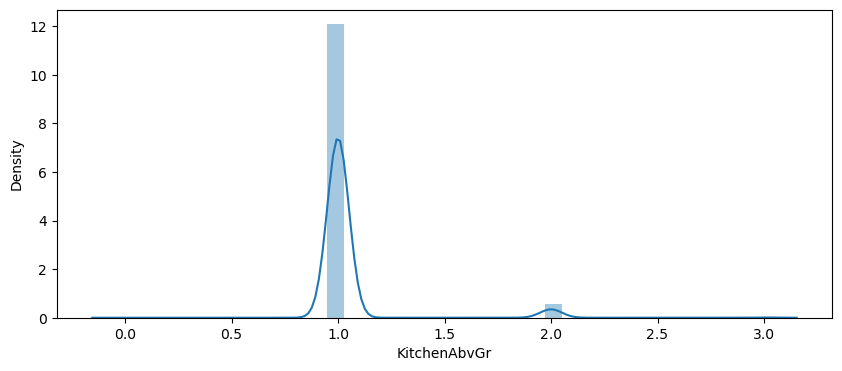

KDE plot of: TotRmsAbvGrd


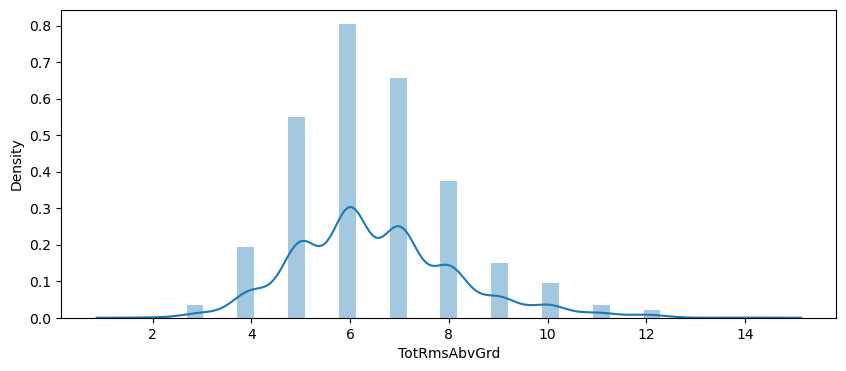

KDE plot of: Fireplaces


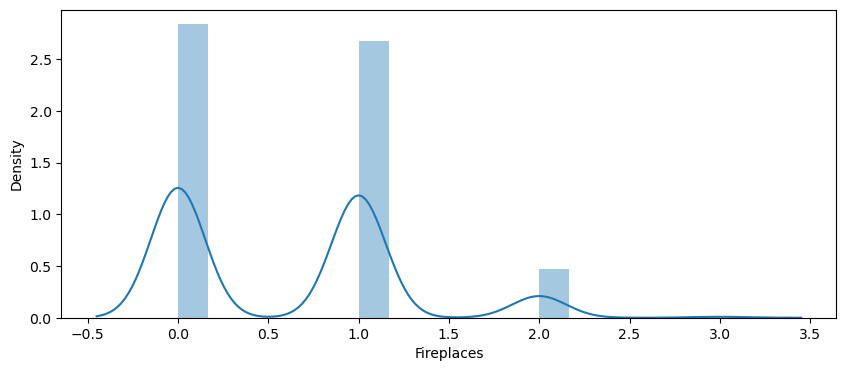

KDE plot of: GarageYrBlt


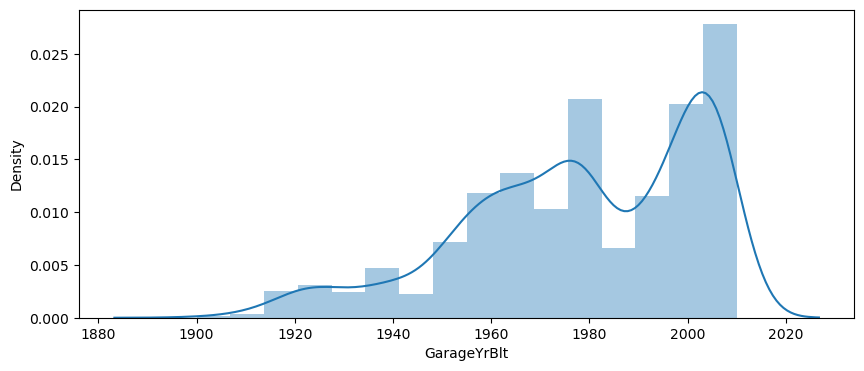

KDE plot of: GarageCars


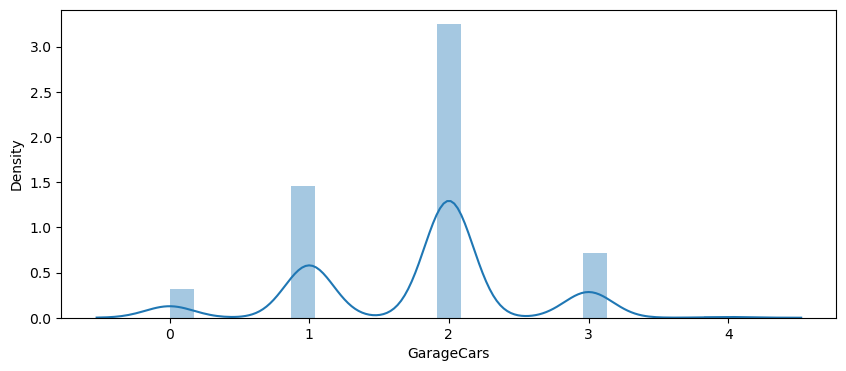

KDE plot of: GarageArea


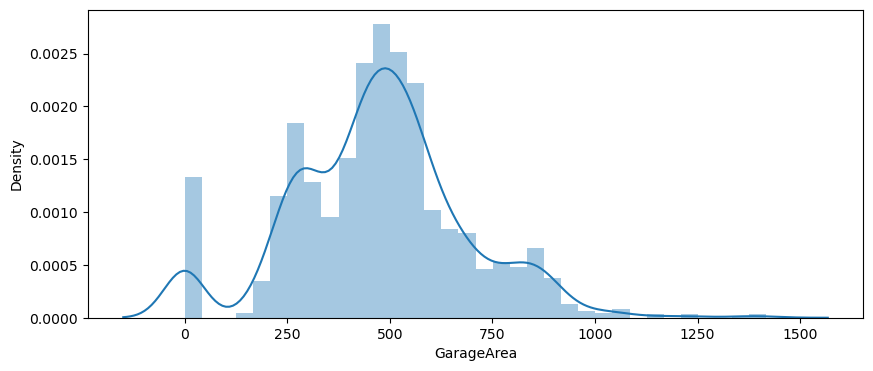

KDE plot of: WoodDeckSF


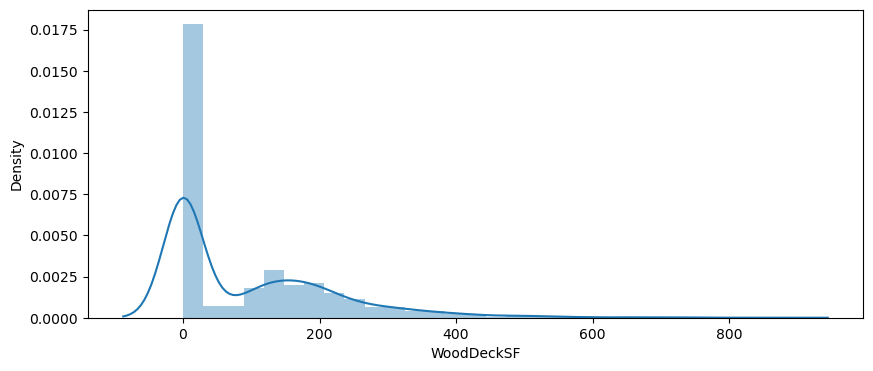

KDE plot of: OpenPorchSF


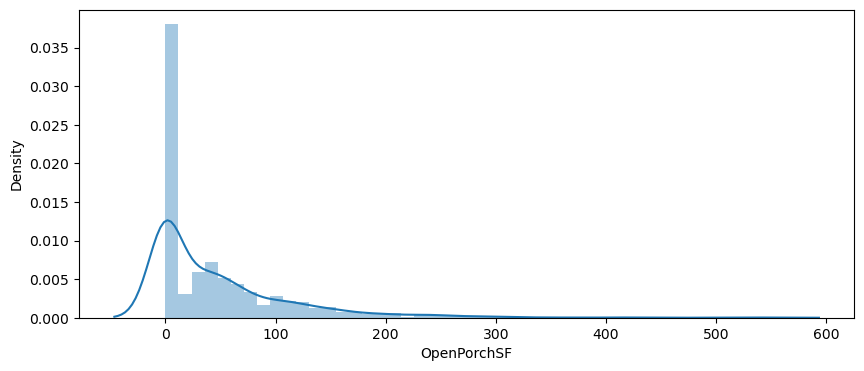

KDE plot of: EnclosedPorch


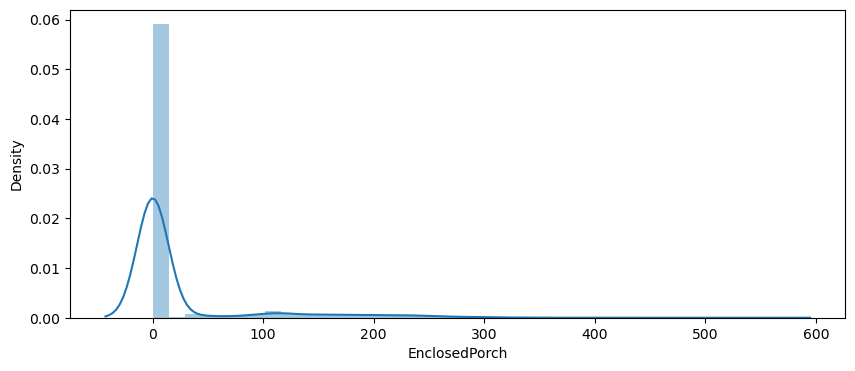

KDE plot of: 3SsnPorch


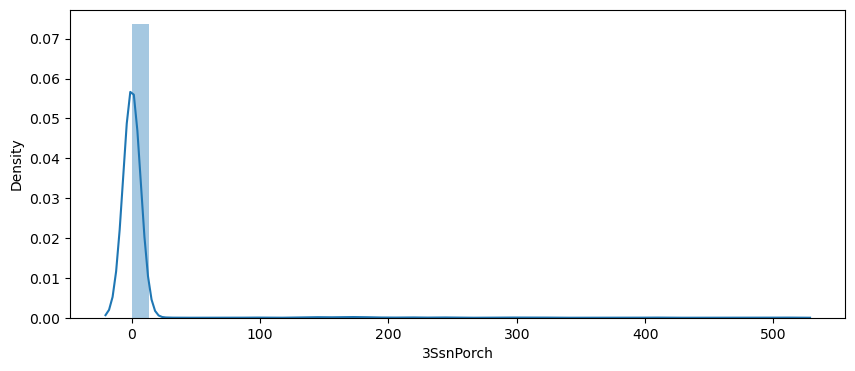

KDE plot of: ScreenPorch


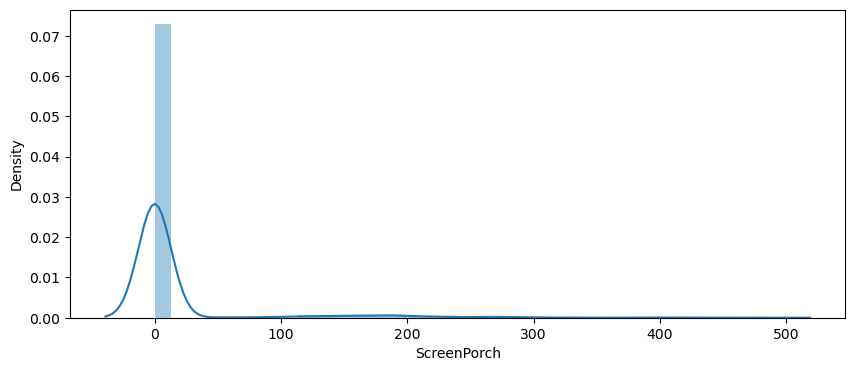

KDE plot of: PoolArea


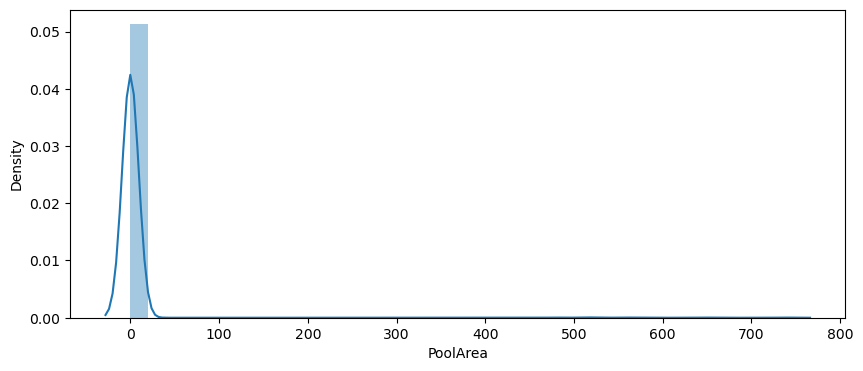

KDE plot of: MiscVal


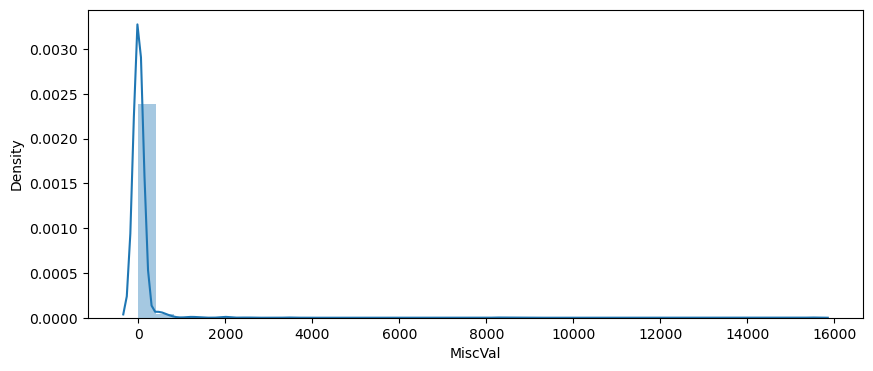

KDE plot of: MoSold


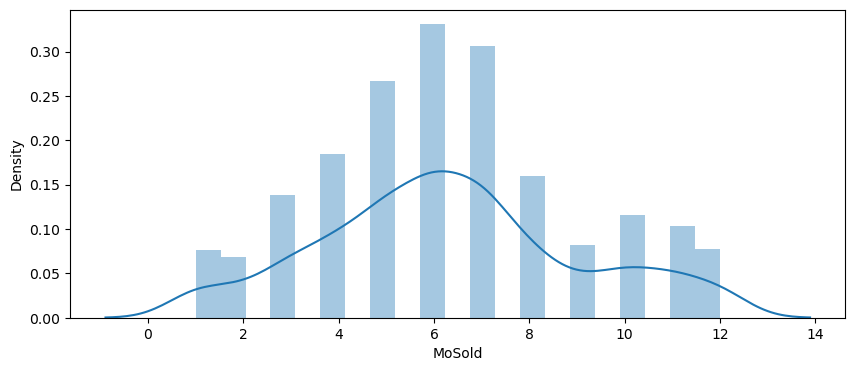

KDE plot of: YrSold


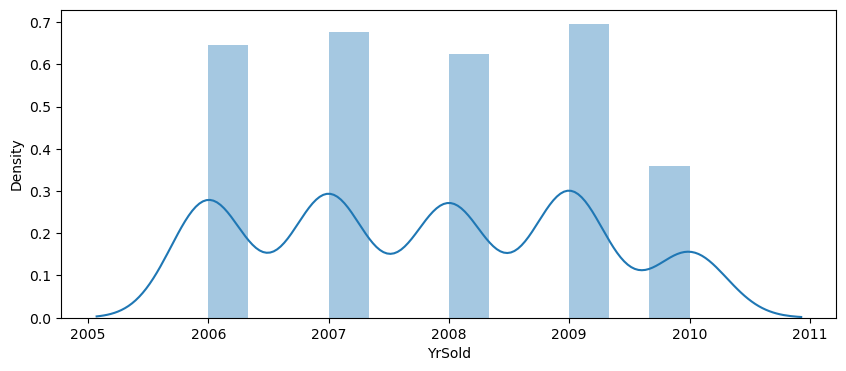

KDE plot of: SalePrice


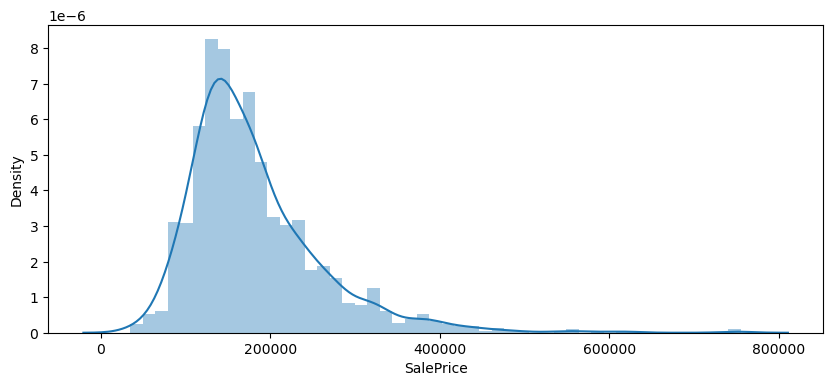

In [23]:
#let's see whether the values are normally distributed or not
for i in numericals_columns:
    print('KDE plot of:',i)
    plt.figure(figsize=(10,4))
    sns.distplot(data[i],kde=True)
    plt.show()

In [24]:
data.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.357056 -0.139781     0.032628   
LotFrontage   -0.009601   -0.357056     1.000000  0.306795     0.234196   
LotArea       -0.033226   -0.139781     0.306795  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234196  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.052820 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.117598  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.082746  0.013788     0.550684   
MasVnrArea    -0.050199    0.022895     0.179283  0.103960     0.410238   
BsmtFinSF1    -0.005024   -0.069836     0.215828  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.043340  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.122156 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.363358  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.414266  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072483  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.036849  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.368392  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.091481  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.006419  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.180424  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.048258  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.237023  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005805 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320146  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.235755  0.271364     0.396765   
GarageYrBlt    0.000070    0.080187     0.064324 -0.024812     0.518018   
GarageCars     0.016570   -0.040110     0.269729  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323663  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.077106  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.137454  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.009790 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.062335  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.037684  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180868  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.001168  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.010158  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.006768 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.334901  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050199   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022895   -0.069836   
LotFrontage      -0.052820   0.117598      0.082746    0.179283    0.215828   
LotArea          -0.005636   0.014228      0.013788    0.103960    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.410238    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.127788   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.314745    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179186    0.128451   
MasVnrArea       -0.127788   0.314745      0.179186    1.000000    0.263582   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.263582    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072302   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114184   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.362452    0

* Now we are going to plot heatmap to visualize correlation in a better way.

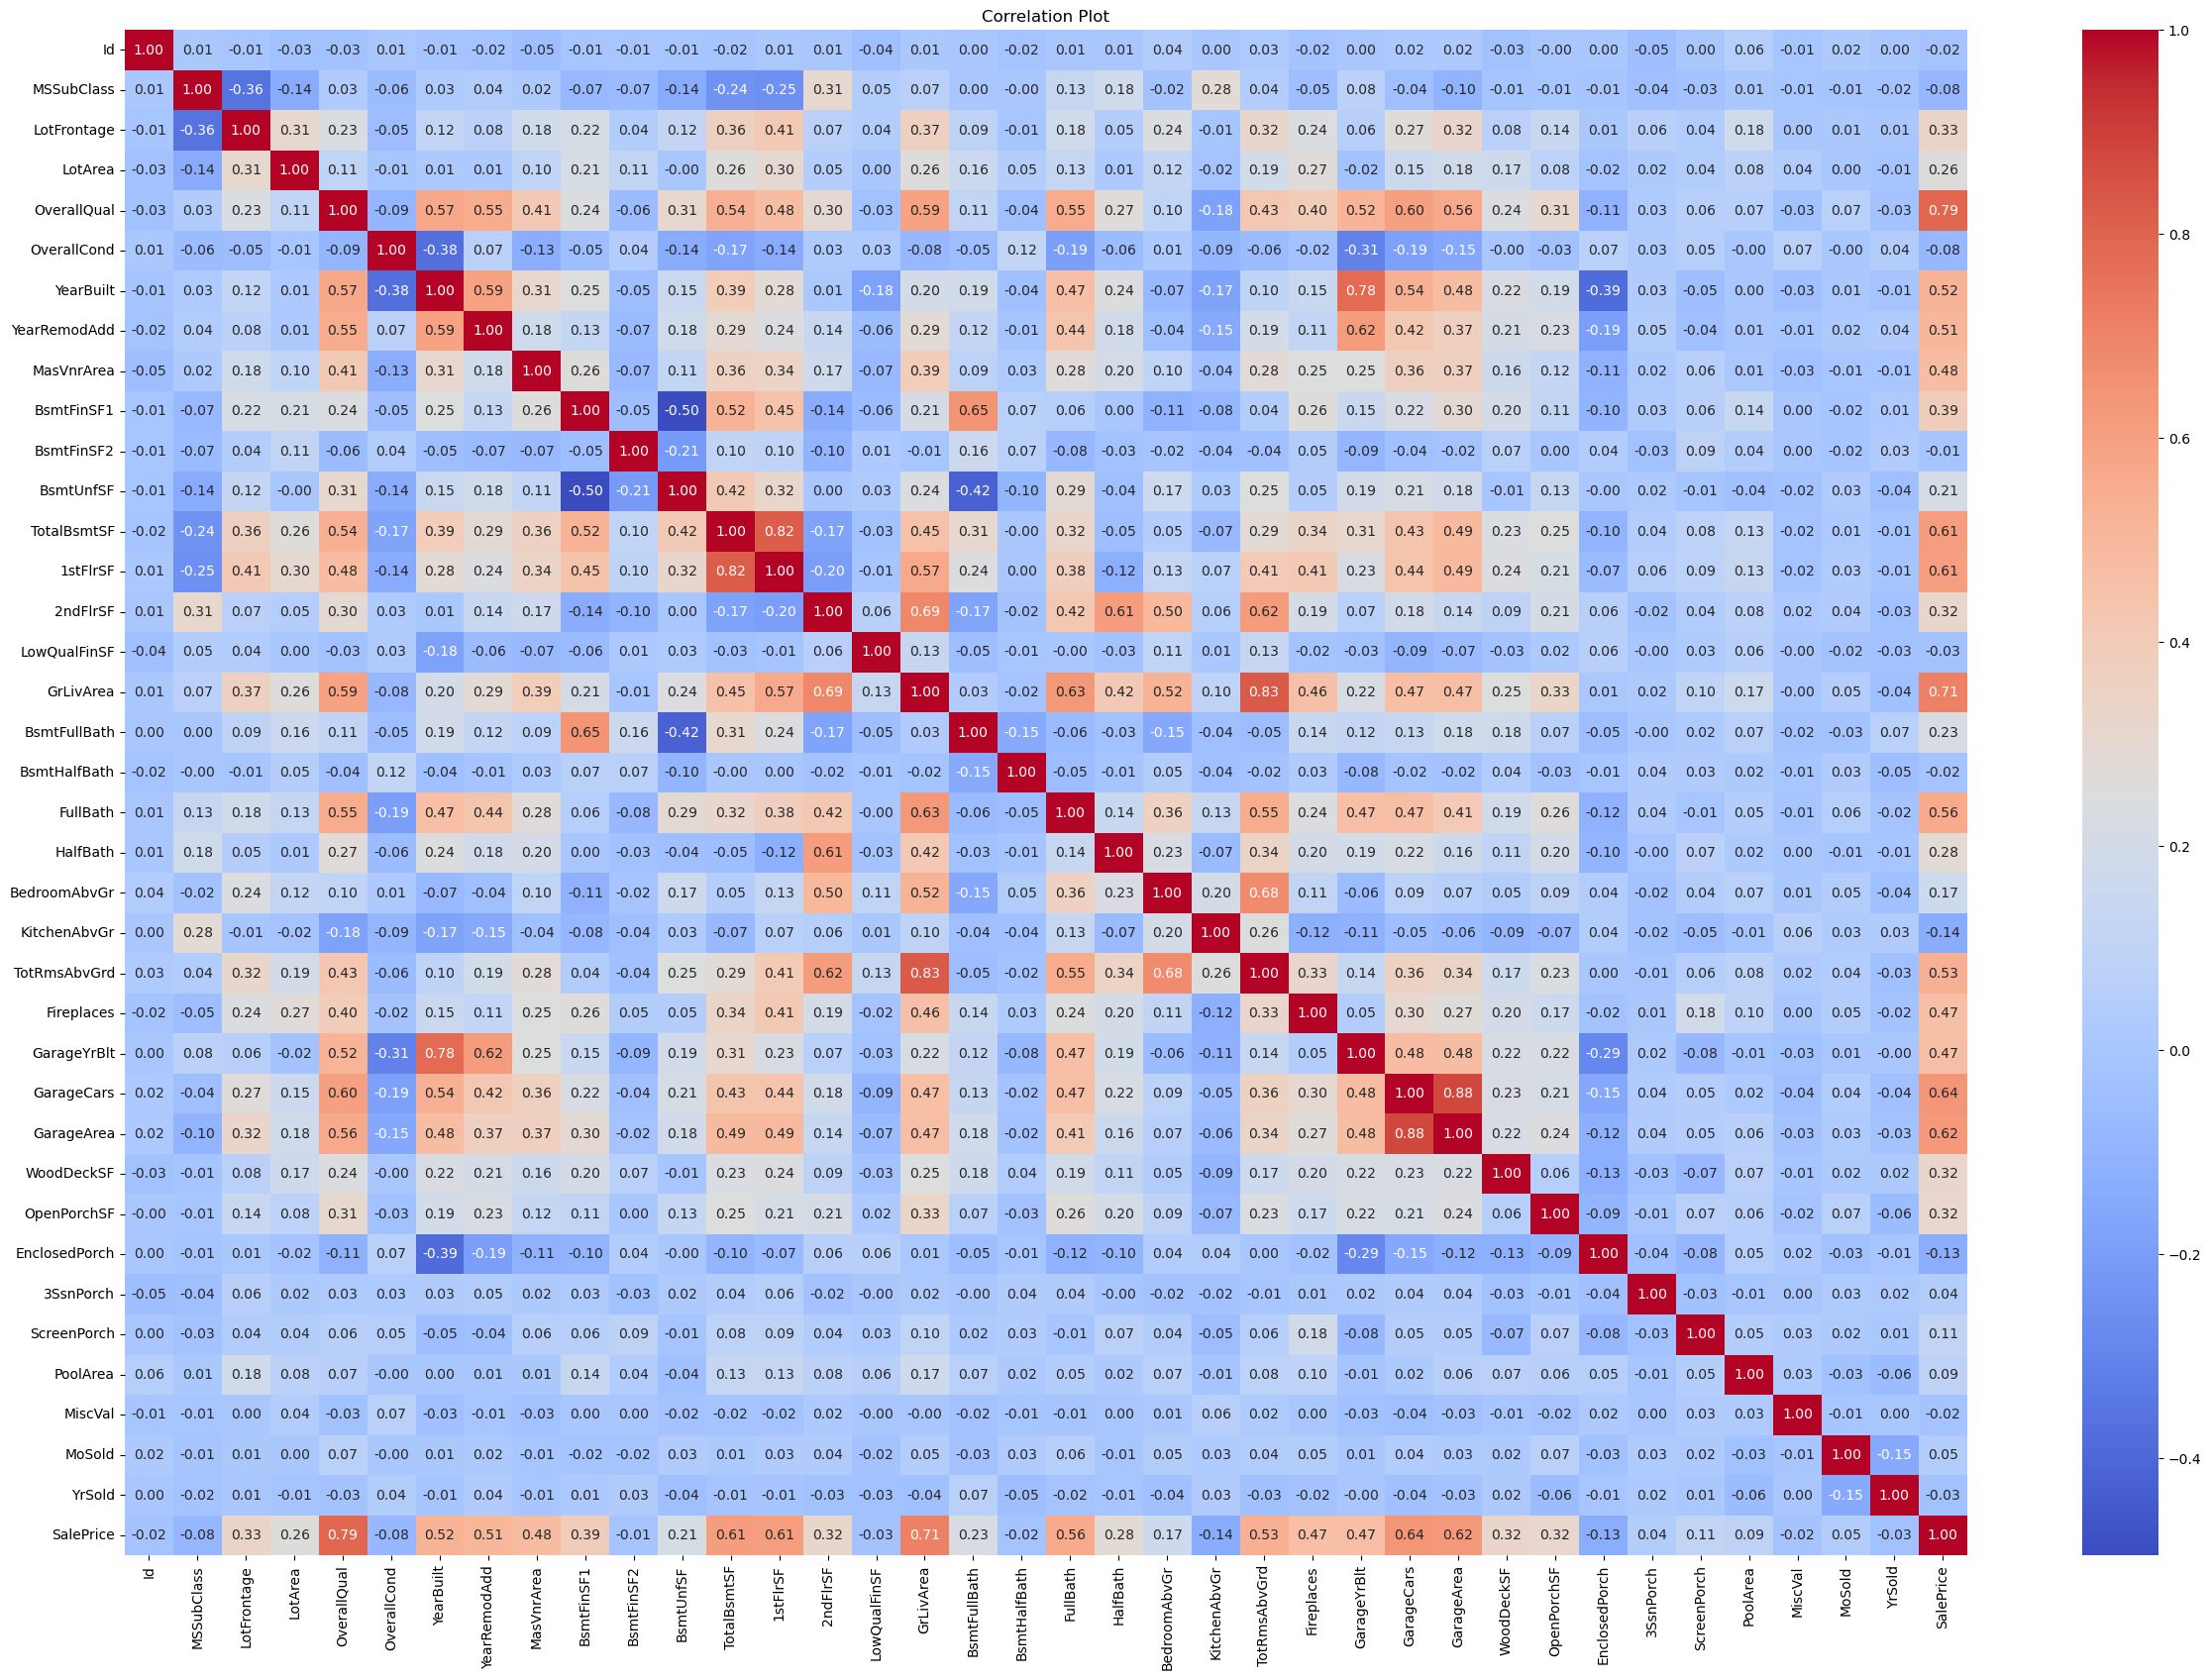

In [25]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),cmap='coolwarm',fmt='.2f',annot=True)
plt.title('Correlation Plot')
plt.show()

* As we can visualize from this heatmap that 35snPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold varibales has low correlation with other varisbles.

In [26]:
df=data.copy()

In [27]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

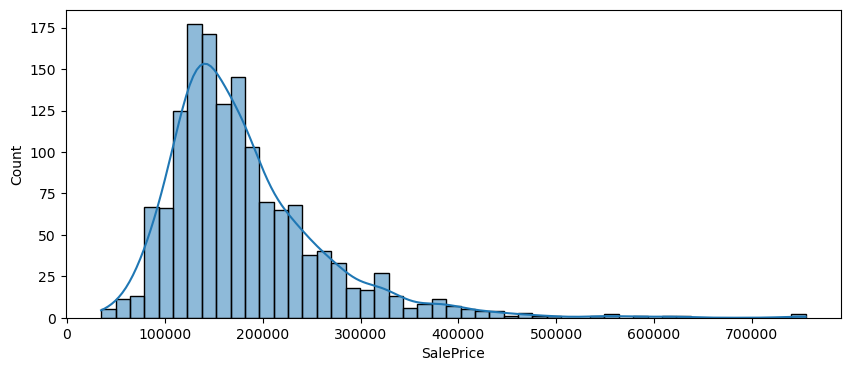

In [28]:
plt.figure(figsize=(10,4))
sns.histplot(df['SalePrice'],kde=True)
plt.show()

* As we can see, the distribution of the target variable is right skewed. So we need to do log transformation and see how it works.

In [29]:
df['SalePrice']=np.log(df['SalePrice'])

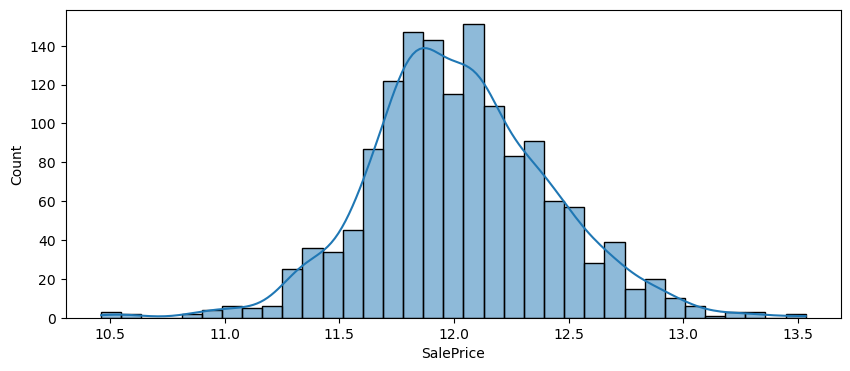

In [30]:
plt.figure(figsize=(10,4))
sns.histplot(df['SalePrice'],kde=True)
plt.show()

In [31]:
from scipy import stats

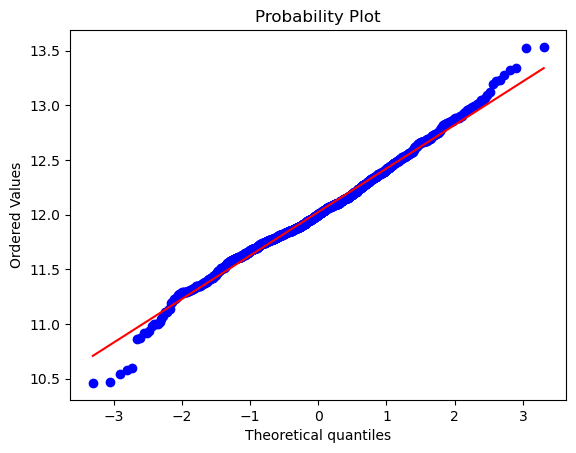

In [32]:
fig=plt.figure()
res=stats.probplot(df['SalePrice'],plot=plt)

In [33]:
#skewness
skewness=df[numericals_columns].skew()
print(skewness)

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

* As we can see there are many numerical variables who have very high skew value.

In [34]:
#let's transform right skewed values
skewed_columns=skewness[(skewness>1)]
skewed_columns

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
TotalBsmtSF       1.524255
1stFlrSF          1.376757
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
dtype: float64

In [35]:
skewed_features=['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF1','TotalBsmtSF','1stFlrSF',
                'LowQualFinSF','GrLivArea','BsmtHalfBath','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                'ScreenPorch','PoolArea','MiscVal']

In [36]:
for i in skewed_features:
    df[i]=np.log1p(df[i])

In [37]:
transformed_features=['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF1','TotalBsmtSF','1stFlrSF',
                'LowQualFinSF','GrLivArea','BsmtHalfBath','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                'ScreenPorch','PoolArea','MiscVal']

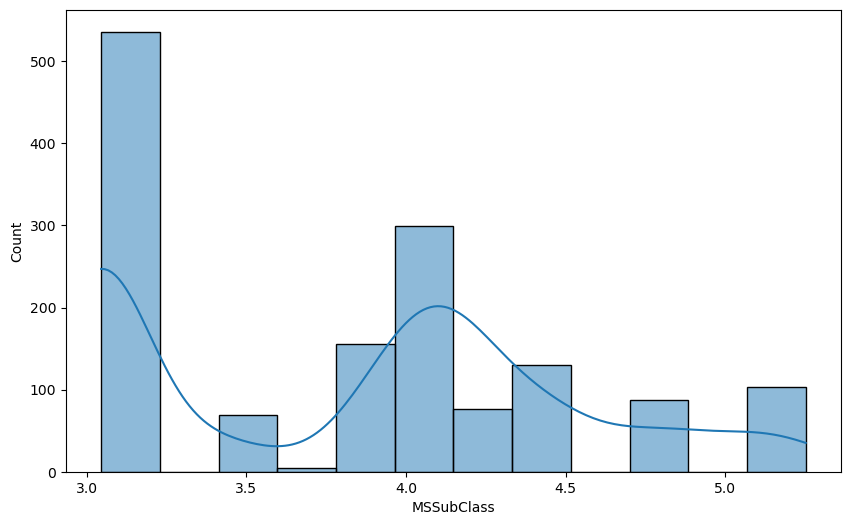

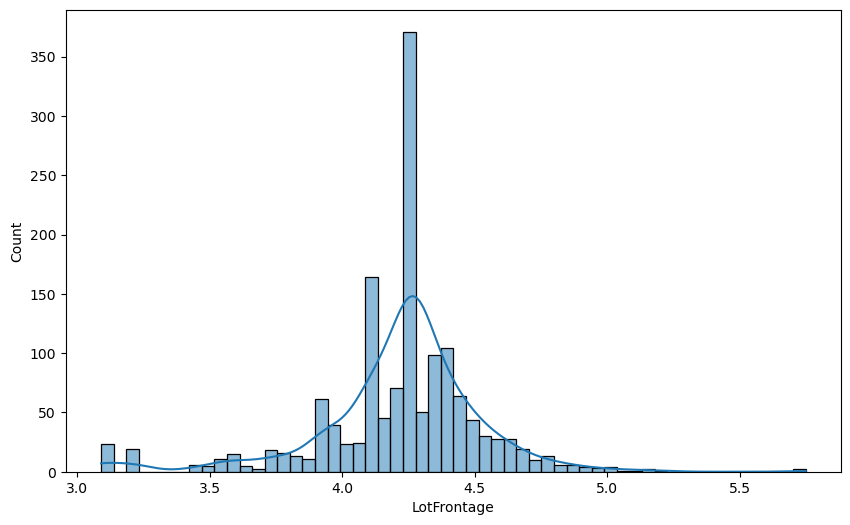

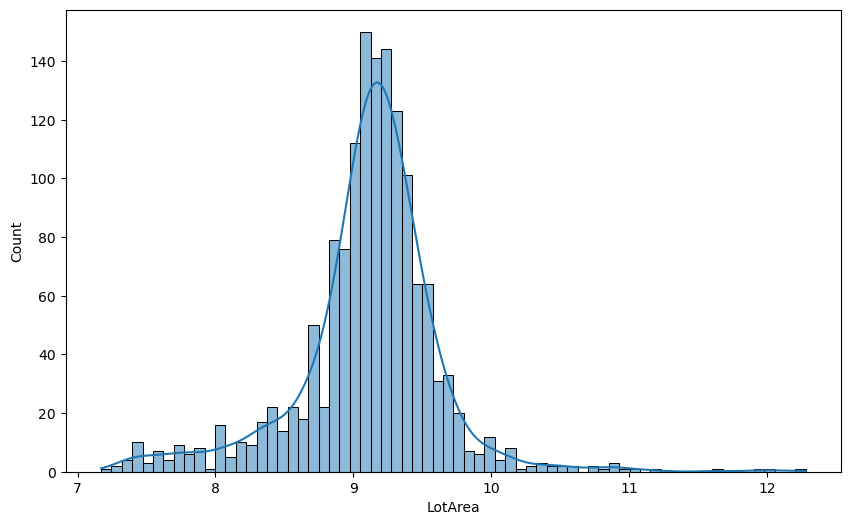

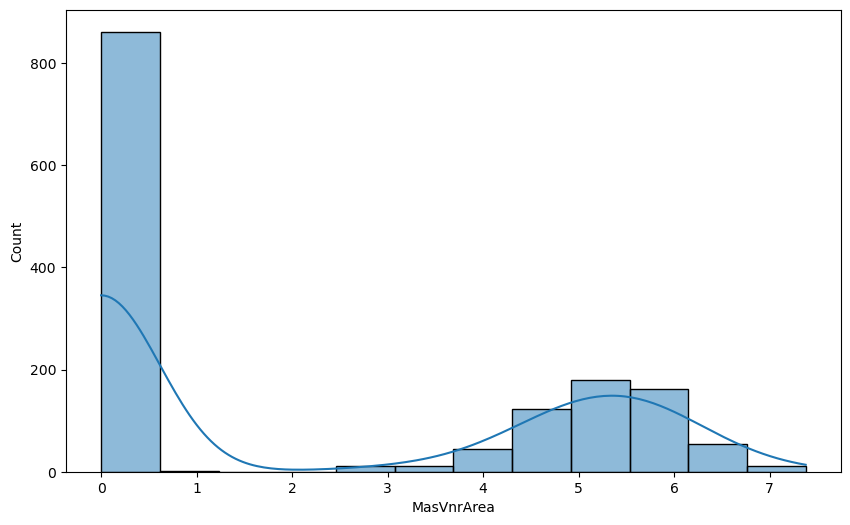

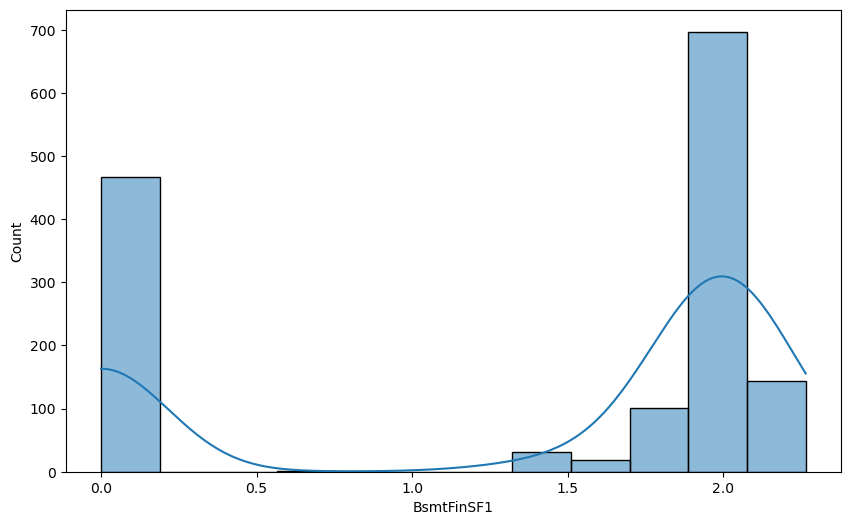

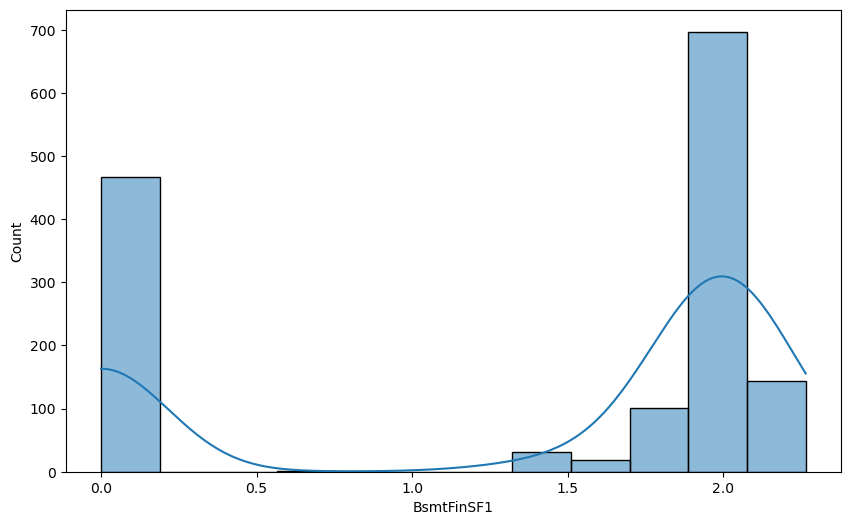

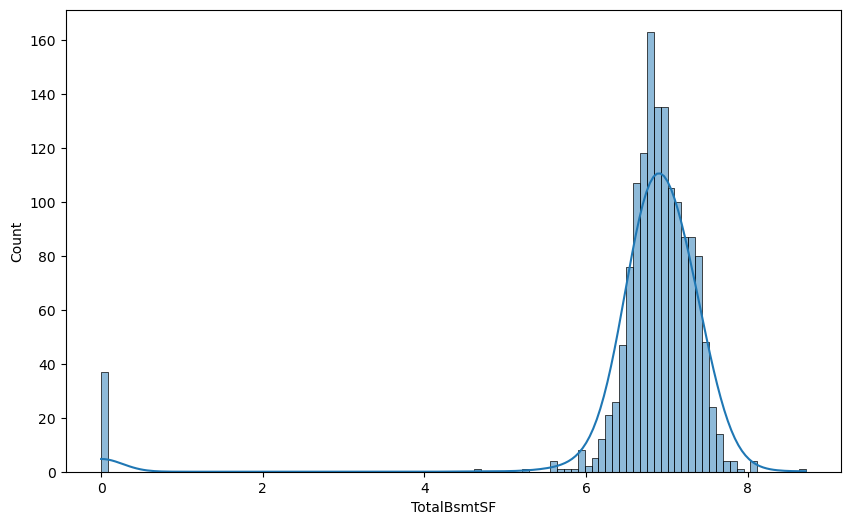

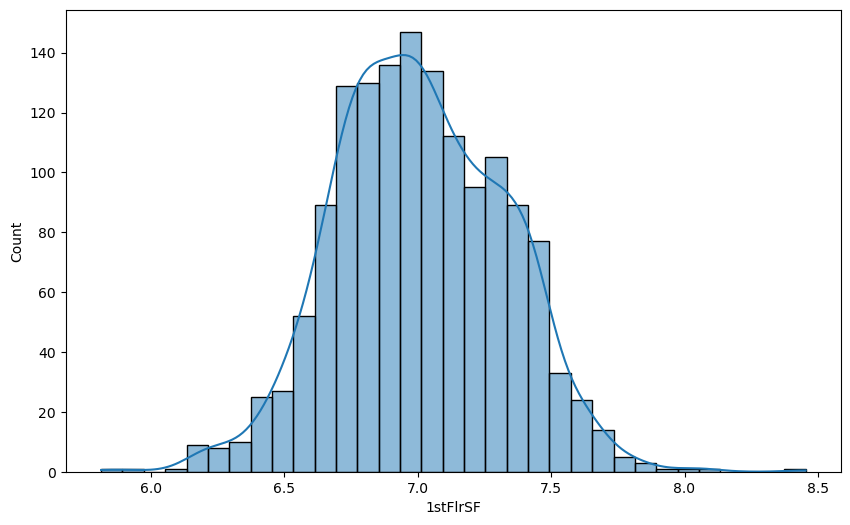

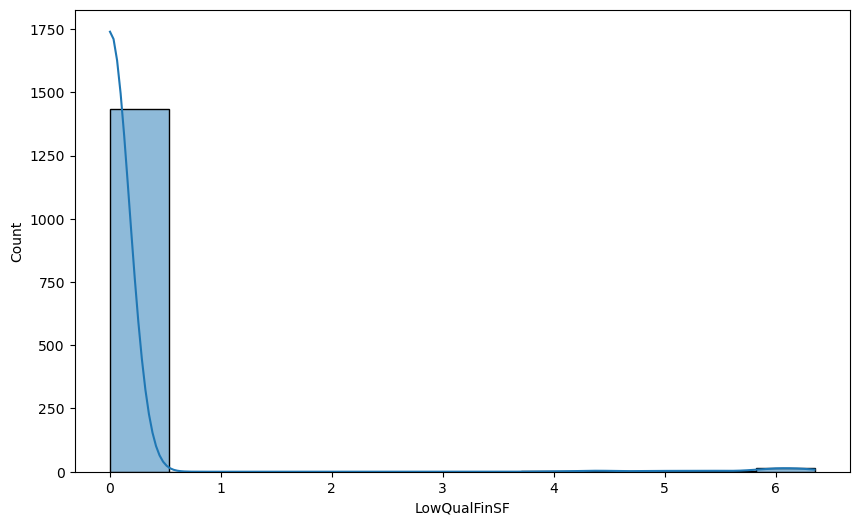

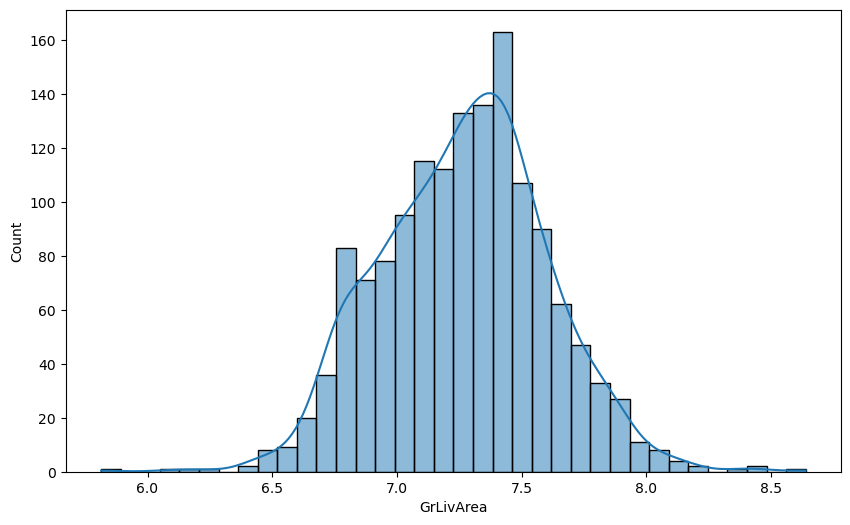

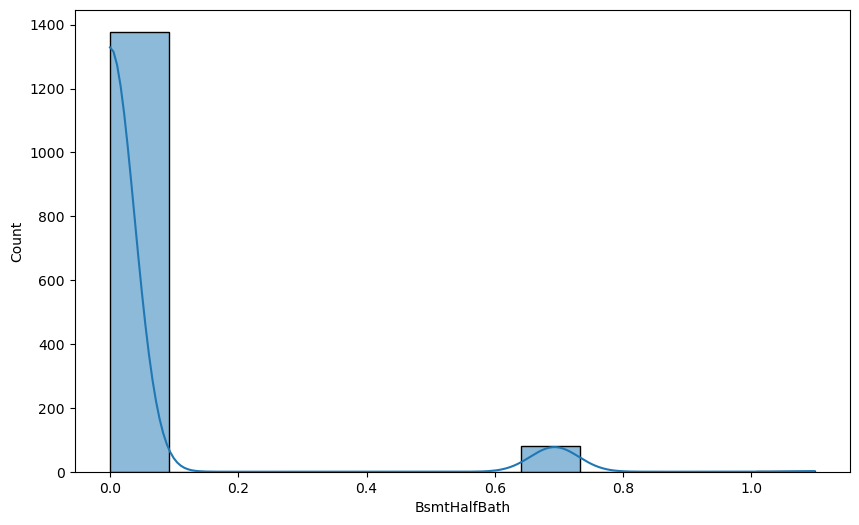

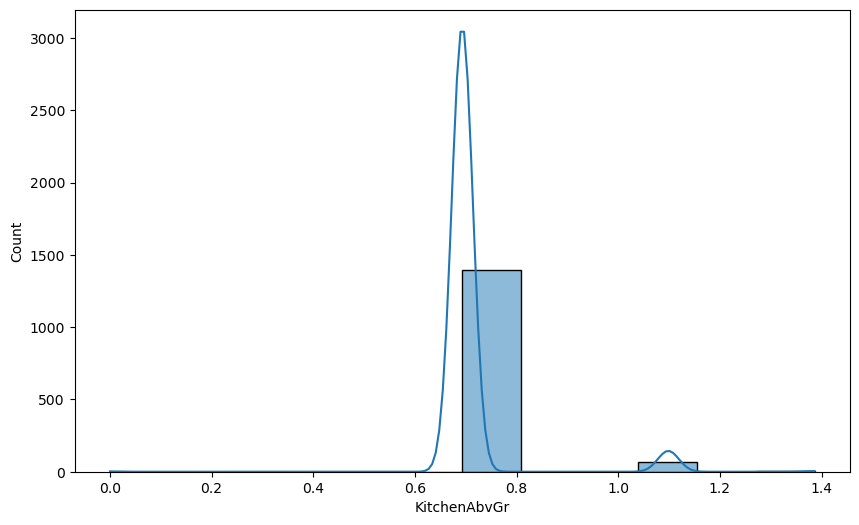

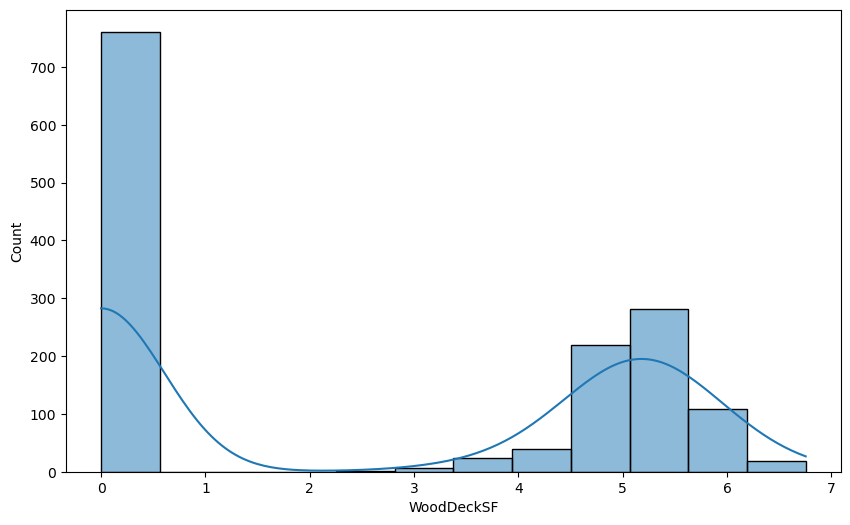

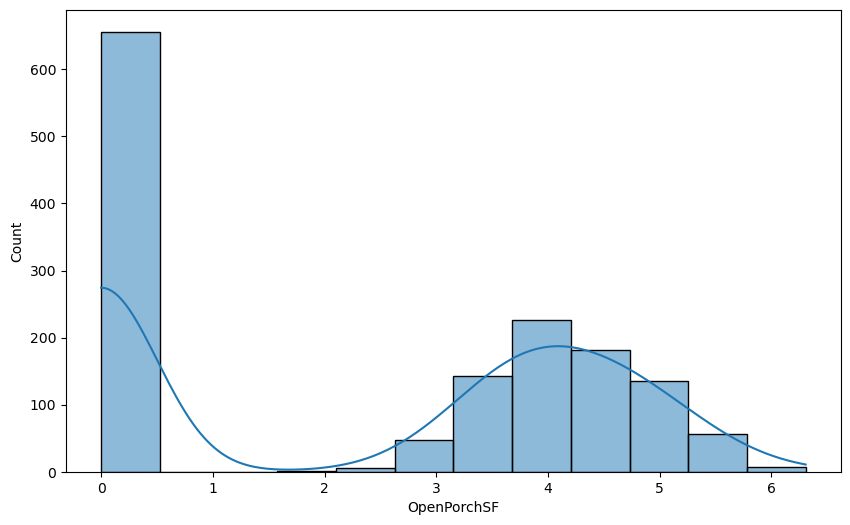

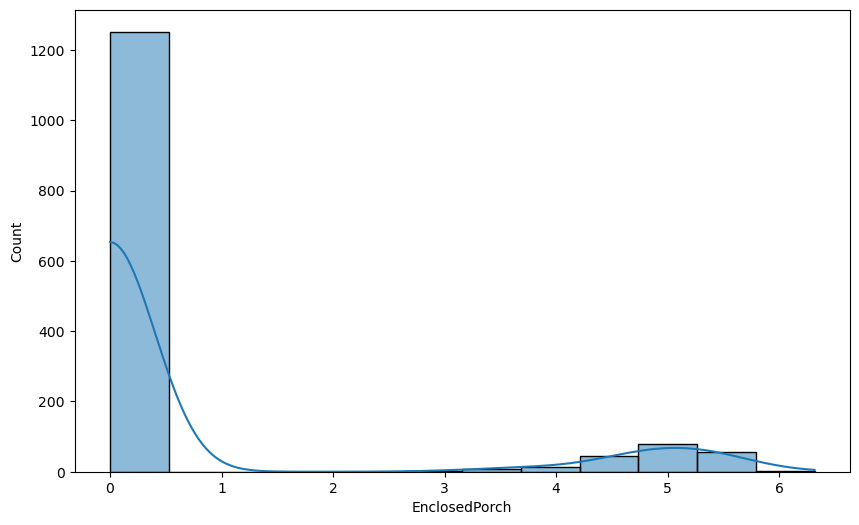

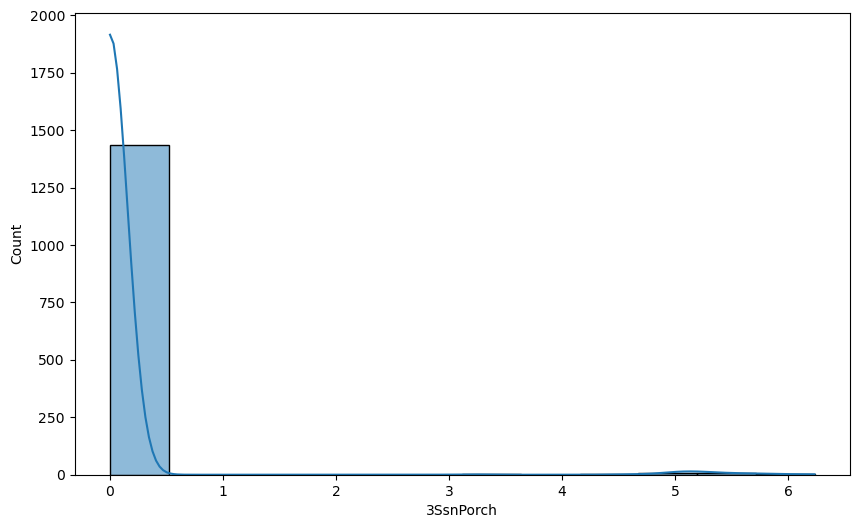

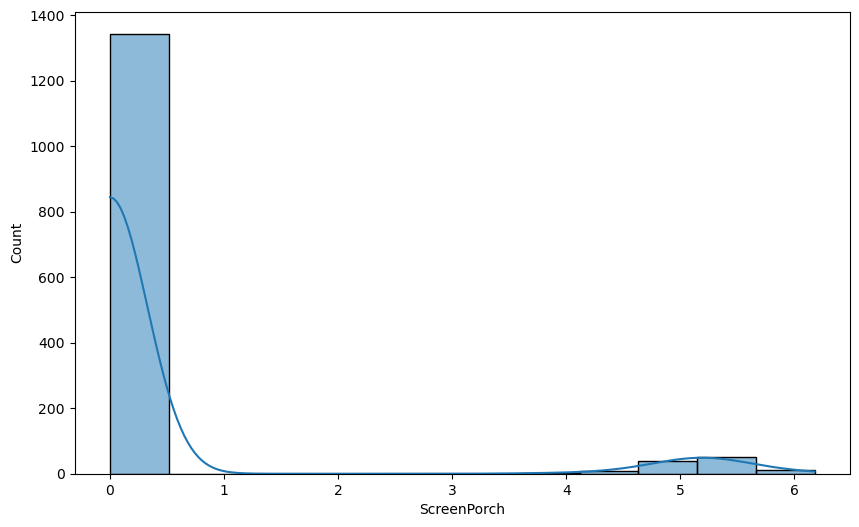

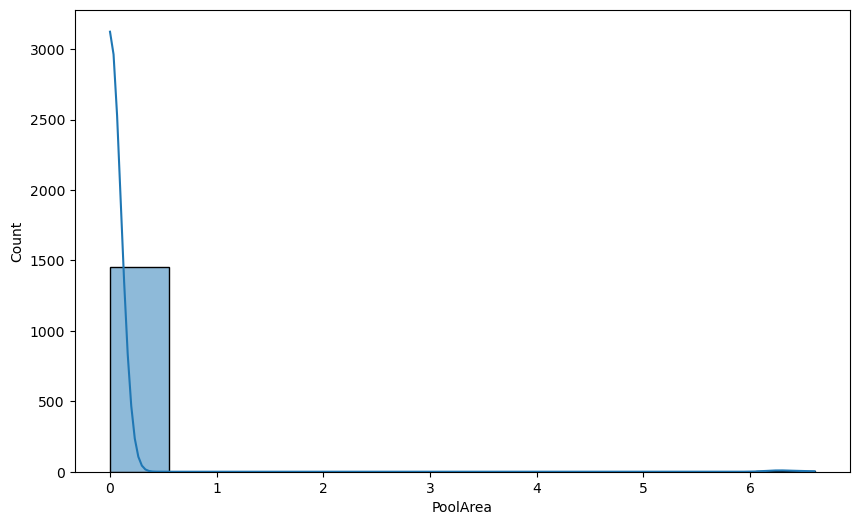

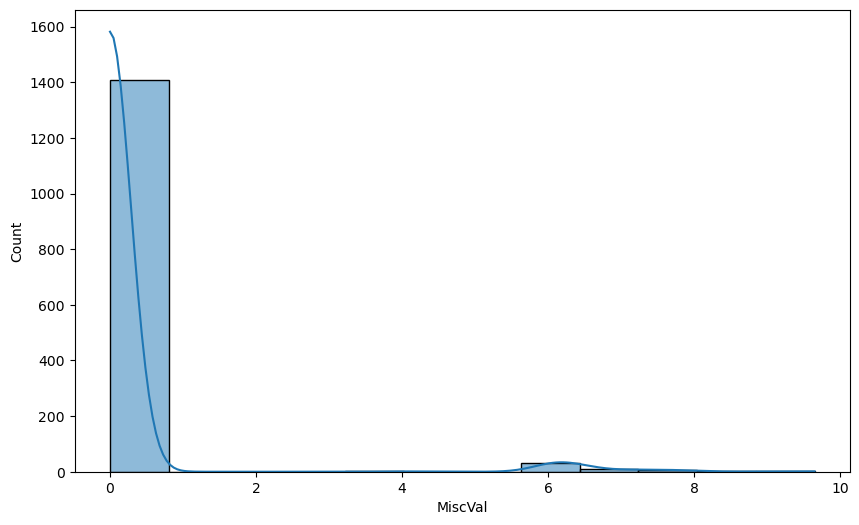

In [38]:
for i in transformed_features:
    plt.figure(figsize=(10,6))
    sns.histplot(df[i],kde=True)
    plt.show()

In [39]:
#skewness
skewness=df[numericals_columns].skew()
print(skewness)

Id                0.000000
MSSubClass        0.248997
LotFrontage      -0.891977
LotArea          -0.137404
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        0.481120
BsmtFinSF1       -0.726863
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF      -5.154670
1stFlrSF          0.080114
2ndFlrSF          0.813030
LowQualFinSF      7.460317
GrLivArea        -0.006140
BsmtFullBath      0.596067
BsmtHalfBath      3.933064
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      3.869414
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        0.153537
OpenPorchSF      -0.023397
EnclosedPorch     2.112275
3SsnPorch         7.734975
ScreenPorch       3.150409
PoolArea         14.363102
MiscVal           5.170704
MoSold            0.212053
YrSold            0.096269
S

# Model Building

In [40]:
df=df.drop('Id',axis=1)

In [41]:
#encoding the object columns
df=pd.get_dummies(df,columns=object_columns,drop_first=True)

**Segragting Independent and dependent variables**

In [42]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

**Splitting the data into train and test**

In [43]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.2,random_state=42)

**Linear Regression**

In [44]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error,r2_score

In [45]:
linear_model=LR()

In [46]:
#training the model
linear_model.fit(train_x,train_y)

LinearRegression()

In [47]:
#predicting the model
y_pred=linear_model.predict(test_x)
y_pred

array([11.95957689, 12.74058423, 11.55314465, 12.03916626, 12.68583303,
       11.2384515 , 12.44776636, 11.91457806, 11.21696139, 11.88554324,
       11.88256551, 11.62075186, 11.32200969, 12.2240591 , 12.05630815,
       11.79967052, 12.15302503, 11.78706414, 11.64930659, 12.28454129,
       11.95222675, 12.23610793, 12.07390404, 11.78389403, 12.20467563,
       11.93797401, 12.1567841 , 11.62691449, 12.10260781, 12.20553375,
       12.01516856, 12.52324539, 12.23314275, 11.67394506, 12.44580399,
       11.89825885, 11.85521157, 12.20622778, 12.68285175, 11.63089076,
       11.76459905, 12.28694034, 11.62497014, 12.80292706, 11.75743679,
       11.77979849, 11.53603821, 11.80557157, 12.99774391, 11.84994368,
       11.6827939 , 12.22064133, 11.53714276, 12.56112498, 11.97218907,
       12.40960579, 12.21966349, 11.9748451 , 11.76099408, 11.45842288,
       11.19439594, 12.02289619, 12.62839065, 12.43781564, 12.61628326,
       12.26140868, 11.60334188, 12.63666767, 11.82030223, 12.04

In [48]:
mse=mean_squared_error(test_y,y_pred)
rmse=np.sqrt(mse)
r2_score_LR=r2_score(test_y,y_pred)
print('Mean Squared Error',mse)
print('Room Mean Squared Error',rmse)
print('Accuracy Score',r2_score_LR)

Mean Squared Error 0.019286588301985992
Room Mean Squared Error 0.13887616174846565
Accuracy Score 0.896649564923984


**Regularization**
 * Ridge and Lasso

In [49]:
from sklearn.linear_model import Ridge,Lasso

In [50]:
Lasso_Model=Lasso()
Ridge_Model=Ridge()

In [51]:
Lasso_Model.fit(train_x,train_y)

Lasso()

In [52]:
lasso_predict_y=Lasso_Model.predict(test_x)

In [53]:
Ridge_Model.fit(train_x,train_y)

Ridge()

In [54]:
ridge_predict_y=Ridge_Model.predict(test_x)

In [55]:
from sklearn.metrics import r2_score
mse_lasso=mean_squared_error(test_y,lasso_predict_y)
rmse_lasso=np.sqrt(mse_lasso)
r2_score_lasso=r2_score(test_y,lasso_predict_y)


mse_ridge=mean_squared_error(test_y,ridge_predict_y)
rmse_ridge=np.sqrt(mse_ridge)
r2_score_ridge=r2_score(test_y,ridge_predict_y)

print('Lasso Regression- Mean Squared Error:',mse_lasso)
print('Lasso Regression- Root Mean Squared Error:',rmse_lasso)
print('Lasso Regression- Accuracy Score:',r2_score_lasso)
print('\n')
print('Ridge Regression- Mean Squared Error:',mse_ridge)
print('Ridge Regression- Root Mean Squared Error:',rmse_ridge)
print('Ridge Regression- Accuracy Score:',r2_score_ridge)

Lasso Regression- Mean Squared Error: 0.07522464663558273
Lasso Regression- Root Mean Squared Error: 0.27427111885064154
Lasso Regression- Accuracy Score: 0.5968960483577865


Ridge Regression- Mean Squared Error: 0.018069306804669467
Ridge Regression- Root Mean Squared Error: 0.13442212170870338
Ridge Regression- Accuracy Score: 0.9031725730572935


**Decision Tree**

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
Decision_Tree_Model=DecisionTreeRegressor(random_state=42,max_depth=4)

In [58]:
Decision_Tree_Model.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [59]:
decision_tree_predict_y=Decision_Tree_Model.predict(test_x)

In [60]:
decision_tree_predict_y

array([11.88910446, 12.45696852, 11.88910446, 12.12658171, 12.64846197,
       11.60852065, 12.20089701, 12.12658171, 11.60852065, 11.75554181,
       11.94847426, 11.7182368 , 11.7182368 , 12.20089701, 12.12658171,
       11.88910446, 12.20089701, 11.88910446, 11.88910446, 12.20089701,
       11.75554181, 11.99802357, 12.12658171, 11.7182368 , 12.20089701,
       11.88910446, 12.20089701, 11.7182368 , 12.12658171, 12.20089701,
       11.60852065, 12.33941277, 11.75554181, 11.7182368 , 12.64846197,
       11.88910446, 11.75554181, 12.20089701, 12.64846197, 11.60852065,
       11.7182368 , 12.33941277, 11.7182368 , 12.64846197, 11.7182368 ,
       11.89510474, 11.7182368 , 11.7182368 , 12.64846197, 11.99607385,
       11.7182368 , 12.12658171, 11.60852065, 12.45696852, 11.7182368 ,
       12.20089701, 12.20089701, 11.88910446, 11.88910446, 11.60852065,
       11.29359693, 11.88910446, 12.64846197, 12.45696852, 12.64846197,
       12.12658171, 11.60852065, 12.64846197, 11.7182368 , 12.12

In [61]:
from sklearn.metrics import mean_squared_error,r2_score

In [62]:
mse_decision_tree=mean_squared_error(test_y,decision_tree_predict_y)
rmse_decision_tree=np.sqrt(mse_decision_tree)
r2_score_decision_tree=r2_score(test_y,decision_tree_predict_y)

print('Decision Tree- Mean Squared Error:',mse_decision_tree)
print('Decision Tree- Root Mean Squared Error:',rmse_decision_tree)
print('Decision Tree- Accuracy Score:',r2_score_decision_tree)

Decision Tree- Mean Squared Error: 0.04333675907368393
Decision Tree- Root Mean Squared Error: 0.20817482814616164
Decision Tree- Accuracy Score: 0.7677726700585755


# Ensemble Techniques
 * Bagging
   * Random Forest
 * Boosting  
   * Gradient Boosting Algo
   * XGBoost
   * Adaptive Boost

**Random Forest**

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
random_forest_model=RandomForestRegressor(max_depth=12,random_state=42,n_estimators=10)

In [65]:
random_forest_model.fit(train_x,train_y)

RandomForestRegressor(max_depth=12, n_estimators=10, random_state=42)

In [66]:
random_forest_predict_y=random_forest_model.predict(test_x)

In [67]:
from sklearn.metrics import mean_squared_error,r2_score

In [68]:
mse_random_forest=mean_squared_error(test_y,random_forest_predict_y)
rmse_random_forest=np.sqrt(mse_random_forest)
r2_score_random_forest=r2_score(test_y,random_forest_predict_y)

print('Random Forest- Mean Squared Error:',mse_random_forest)
print('Random Forest- Root Mean Squared Error:',rmse_random_forest)
print('Random Forest- Accuracy Score:',r2_score_random_forest)

Random Forest- Mean Squared Error: 0.02499939175984245
Random Forest- Root Mean Squared Error: 0.15811195957245755
Random Forest- Accuracy Score: 0.8660365444338626


**Gradient Boosting**

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
gradient_boosting_model=GradientBoostingRegressor(random_state=42)

In [71]:
gradient_boosting_model.fit(train_x,train_y)

GradientBoostingRegressor(random_state=42)

In [72]:
gradient_boosting_predict_y=gradient_boosting_model.predict(test_x)

In [73]:
from sklearn.metrics import mean_squared_error,r2_score
mse_gradient_boosting=mean_squared_error(test_y,gradient_boosting_predict_y)
rmse_gradient_boosting=np.sqrt(mse_gradient_boosting)
r2_score_gradient_boosting=r2_score(test_y,gradient_boosting_predict_y)

print('Gradient Boosting- Mean Squared Error:',mse_gradient_boosting)
print('Gradient Boosting- Root Mean Squared Error:',rmse_gradient_boosting)
print('Gradient Boosting- Accuracy Score:',r2_score_gradient_boosting)

Gradient Boosting- Mean Squared Error: 0.018444580689925247
Gradient Boosting- Root Mean Squared Error: 0.1358108268509004
Gradient Boosting- Accuracy Score: 0.9011616046731207


**XGBoosting**

In [74]:
from xgboost import XGBRegressor

In [75]:
XGBoost_Model=XGBRegressor(random_state=42)

In [76]:
XGBoost_Model.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [77]:
XGBoost_predict_y=XGBoost_Model.predict(test_x)

In [78]:
from sklearn.metrics import mean_squared_error,r2_score
mse_XGBoost=mean_squared_error(test_y,XGBoost_predict_y)
rmse_XGBoost=np.sqrt(mse_XGBoost)
r2_score_XGBoost=r2_score(test_y,XGBoost_predict_y)

print('XG Boosting- Mean Squared Error:',mse_XGBoost)
print('XG Boosting- Root Mean Squared Error:',rmse_XGBoost)
print('XG Boosting- Accuracy Score:',r2_score_XGBoost)

XG Boosting- Mean Squared Error: 0.02504678434305733
XG Boosting- Root Mean Squared Error: 0.15826175894086775
XG Boosting- Accuracy Score: 0.865782583286461


**Adaptive Boosting**

In [79]:
from sklearn.ensemble import AdaBoostRegressor

In [80]:
Adaptive_Model=AdaBoostRegressor(random_state=42)

In [81]:
Adaptive_Model.fit(train_x,train_y)

AdaBoostRegressor(random_state=42)

In [82]:
ada_model_predict_y=Adaptive_Model.predict(test_x)

In [83]:
from sklearn.metrics import mean_squared_error,r2_score
mse_ada_boost=mean_squared_error(test_y,ada_model_predict_y)
rmse_ada_boost=np.sqrt(mse_ada_boost)
r2_score_ada_boost=r2_score(test_y,ada_model_predict_y)

print('Adaptive Boosting- Mean Squared Error:',mse_ada_boost)
print('Adaptive Boosting- Root Mean Squared Error:',rmse_ada_boost)
print('Adaptive- Accuracy Score:',r2_score_ada_boost)

Adaptive Boosting- Mean Squared Error: 0.03143079281201206
Adaptive Boosting- Root Mean Squared Error: 0.17728731712114112
Adaptive- Accuracy Score: 0.8315727975812566


In [84]:
r2_score=[r2_score_LR,r2_score_ridge,r2_score_lasso,r2_score_decision_tree,r2_score_random_forest,r2_score_gradient_boosting,
         r2_score_XGBoost,r2_score_ada_boost]
algo=['Linear Regression','Ridge','Lasso','Decision Tree','Random Forest','Gradient Boosting','XG Boosting','Adaptive Boosting']
r2_score

[0.896649564923984,
 0.9031725730572935,
 0.5968960483577865,
 0.7677726700585755,
 0.8660365444338626,
 0.9011616046731207,
 0.865782583286461,
 0.8315727975812566]

**Comparing All the Models**

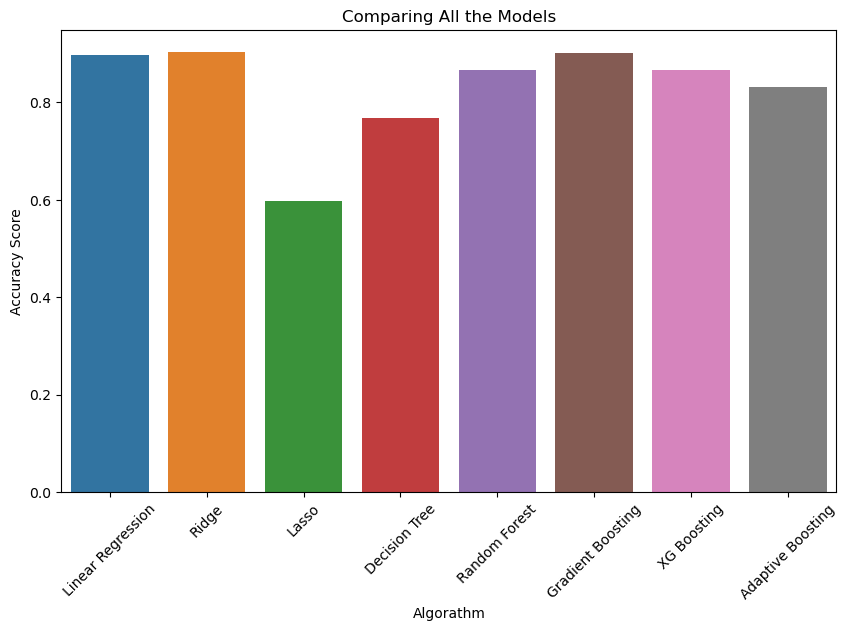

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(x=algo,y=r2_score)
plt.xlabel('Algorathm')
plt.ylabel('Accuracy Score')
plt.title('Comparing All the Models')
plt.xticks(rotation=45)
plt.show()

* We can see Ridge model is performing best in all these models. 
* This could be the result of overfitting.

# Cross Validation
   * As we see the Ridge model has the best accuracy scores in all the models. But this can be result of overfitting. In order to find out the real best model, we will cross validate the models and compare their mean accuracy scores.

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
lg_scores=cross_val_score(linear_model,x,y,cv=10) #cross validation model
print(lg_scores) #accuracy score of all cross validation cycle
print(f'mean of accuracy score for Linear Regression model is {lg_scores.mean()*100}\n')

ridge_scores=cross_val_score(Ridge_Model,x,y,cv=10)
print(ridge_scores)
print(f'mean of accuracy score for ridge model is {ridge_scores.mean()*100}\n')

lasso_scores=cross_val_score(Lasso_Model,x,y,cv=10)
print(lasso_scores)
print(f'mean of accuracy for Lasso model is {lasso_scores.mean()*100}\n')

dt_scores=cross_val_score(Decision_Tree_Model,x,y,cv=10)
print(dt_scores)
print(f'mean of accuracy score for Decision Tree Model is {dt_scores.mean()*100}\n')

rfm_scores=cross_val_score(random_forest_model,x,y,cv=10)
print(rfm_scores)
print(f'mean of accuracy score for Random Forest Tree model is {rfm_scores.mean()*100}\n')

gb_scores=cross_val_score(gradient_boosting_model,x,y,cv=10)
print(gb_scores)
print(f'mean of accuracy score for Gradient Boosting model is {gb_scores.mean()*100}\n')

xgb_scores=cross_val_score(XGBoost_Model,x,y,cv=10)
print(xgb_scores)
print(f'mean of accuracy score for XG Boosting model is {xgb_scores.mean()*100}\n')

ada_scores=cross_val_score(Adaptive_Model,x,y,cv=10)
print(ada_scores)
print(f'mean of accuracy score for Adaptive Model is {ada_scores.mean()*100}\n')

[0.74486118 0.77214967 0.92509055 0.84914515 0.89908462 0.81542787
 0.892518   0.93082727 0.70712108 0.8544682 ]
mean of accuracy score for Linear Regression model is 83.90693591043785

[0.90028103 0.93431186 0.9264017  0.85492831 0.89910066 0.88902135
 0.90152194 0.92133507 0.76089942 0.88344177]
mean of accuracy score for ridge model is 88.71243129547551

[0.63271689 0.66452704 0.66758935 0.57763067 0.59511584 0.66645874
 0.5311322  0.61354787 0.4913762  0.6184331 ]
mean of accuracy for Lasso model is 60.58527900816456

[0.75675231 0.80526459 0.75001083 0.7389177  0.71170118 0.77078157
 0.73688845 0.73791536 0.67303139 0.71576017]
mean of accuracy score for Decision Tree Model is 73.97023533164503

[0.82655245 0.89874383 0.87971298 0.83825827 0.86487997 0.85763933
 0.87835779 0.89024834 0.81943423 0.84753621]
mean of accuracy score for Random Forest Tree model is 86.01363398829376

[0.87127849 0.92866373 0.92227307 0.86204714 0.88389042 0.90876503
 0.87927429 0.91526096 0.89256059 0.

In [88]:
l1=['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest','Gradient Boosting','XG Boosting','Adaptive Boosting']
l2=[r2_score_LR*100,r2_score_lasso*100,r2_score_ridge*100,r2_score_decision_tree*100,r2_score_random_forest*100,
   r2_score_gradient_boosting*100,r2_score_XGBoost*100,r2_score_ada_boost*100]
l3=[lg_scores.mean()*100,ridge_scores.mean()*100,lasso_scores.mean()*100,dt_scores.mean()*100,rfm_scores.mean()*100,
   gb_scores.mean()*100,xgb_scores.mean()*100,ada_scores.mean()*100]
for i in range(0,8):
    temp=(l2[i]-l3[i])
    print(l1[i],temp)

Linear Regression 5.758020581960537
Lasso -29.02282645969686
Ridge 29.73197829756478
Decision Tree 2.8070316742125243
Random Forest 0.5900204550924997
Gradient Boosting 0.6881028486971417
XG Boosting -1.270127206549958
Adaptive Boosting 3.126623173195995


* After the cross validation, we see that the least difference between mean accuracy and total accuracy is given by Random Forest model, so we will build our final model on Random forest only.

# Hyperparameter Tuning
   * We have selected the Random Forest model as the best possible model for this case study, we will now tune the parameters of this model to get the best possible results.

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:

#number of trees in random forest
n_estimators=[10,20,30,50,100,150,200]

#number of features
max_features=['auto','sqrt']

#maximum depth of the tree
max_depth=[4,5,6,7,8,9,10,11,12,13]

#minimum number of samples required to split a node
min_sample_split=[2,5,10]

#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [91]:
rf=RandomForestRegressor()

random_search=RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                n_iter = 100, cv = 5, verbose=2)
random_search.fit(train_x,train_y)
print(random_search.best_score_)
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   1.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   1.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   1.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   1.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   1.0s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; to

* The best parameters for the model are: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 12, 'bootstrap': False}, we will use this parameter to build our model.

In [92]:
from sklearn.metrics import r2_score
rf=RandomForestRegressor(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 2, 
       max_features='sqrt', max_depth= 12, bootstrap= False)
rf.fit(train_x,train_y)
rf_predict_y=rf.predict(test_x)
print(rf.score(train_x,train_y))
print(r2_score(test_y,rf_predict_y))

0.9771092362462377
0.8585145385437987


# Model Evaluation
   * We have built the best models after their cross validation and tuning. It is now time to evaluate the models performance using the evaluation metrics.

In [93]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [94]:
plt.style.use('ggplot')

Accuracy Score of Random Forest Regressor model is 85.85145385437987
The mean absolute error of the fitted model is 0.10481449277666939
The mean squared error of the fitted model is 0.02640309974326867
The root mean squared error of the fitted model is 0.1624903066132521


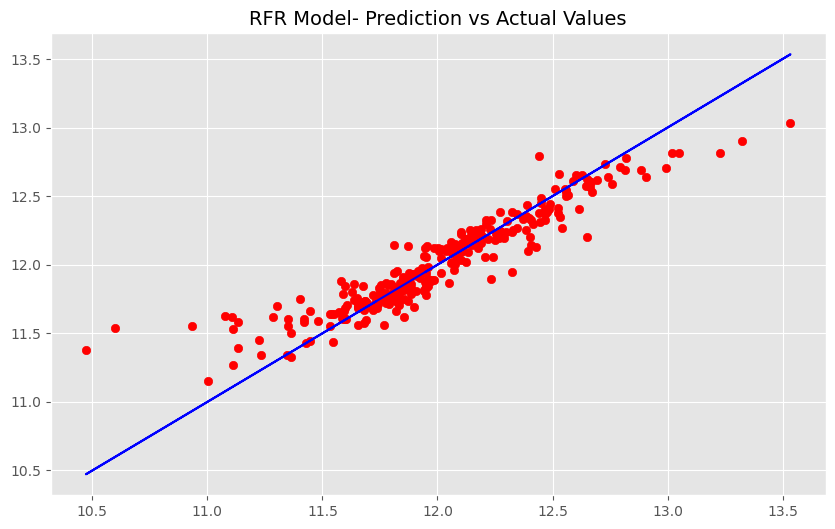

In [95]:
print("Accuracy Score of Random Forest Regressor model is", r2_score(test_y, rf_predict_y)*100)
print("The mean absolute error of the fitted model is", mae(test_y, rf_predict_y))
print("The mean squared error of the fitted model is", mse(test_y, rf_predict_y))
print("The root mean squared error of the fitted model is", np.sqrt(mse(test_y, rf_predict_y)))

plt.figure(figsize = (10,6))
plt.title("RFR Model- Prediction vs Actual Values", fontsize = 14)
plt.scatter(x = test_y, y = rf_predict_y, color = 'r')
plt.plot(test_y, test_y, color = 'b')
plt.show()

# House Price Prediction

In [96]:
rf_predict_y=rf.predict(test_x)
rf_predict_y

array([11.82798728, 12.62051131, 11.69651941, 11.89153721, 12.56477828,
       11.34526355, 12.20170582, 11.93245432, 11.34453294, 11.74391574,
       11.82846452, 11.71777314, 11.69566241, 12.24924499, 12.10141021,
       11.78137634, 12.1839863 , 11.81143965, 11.67522022, 12.25642671,
       12.05767403, 12.22372859, 12.12629816, 11.74794012, 12.2209162 ,
       12.1248696 , 12.15686163, 11.61918388, 12.107321  , 12.17829134,
       11.76910235, 12.5007277 , 12.05961364, 11.6655418 , 12.4886715 ,
       11.89355268, 11.86482122, 12.23589163, 12.57044105, 11.58995643,
       11.75374218, 12.32658246, 11.70535788, 12.79463985, 11.79092577,
       11.84566015, 11.68563498, 11.75040034, 12.81332347, 11.84056823,
       11.71046577, 12.22799557, 11.72310719, 12.50836452, 11.90546363,
       12.37141404, 12.19668246, 11.96040567, 11.88424883, 11.61379397,
       11.38953858, 11.87064777, 12.60040273, 12.40706125, 12.54969284,
       12.1998548 , 11.60313475, 12.65085208, 11.6650792 , 12.00

In [97]:
final_y=rf_predict_y

In [98]:
final_y

array([11.82798728, 12.62051131, 11.69651941, 11.89153721, 12.56477828,
       11.34526355, 12.20170582, 11.93245432, 11.34453294, 11.74391574,
       11.82846452, 11.71777314, 11.69566241, 12.24924499, 12.10141021,
       11.78137634, 12.1839863 , 11.81143965, 11.67522022, 12.25642671,
       12.05767403, 12.22372859, 12.12629816, 11.74794012, 12.2209162 ,
       12.1248696 , 12.15686163, 11.61918388, 12.107321  , 12.17829134,
       11.76910235, 12.5007277 , 12.05961364, 11.6655418 , 12.4886715 ,
       11.89355268, 11.86482122, 12.23589163, 12.57044105, 11.58995643,
       11.75374218, 12.32658246, 11.70535788, 12.79463985, 11.79092577,
       11.84566015, 11.68563498, 11.75040034, 12.81332347, 11.84056823,
       11.71046577, 12.22799557, 11.72310719, 12.50836452, 11.90546363,
       12.37141404, 12.19668246, 11.96040567, 11.88424883, 11.61379397,
       11.38953858, 11.87064777, 12.60040273, 12.40706125, 12.54969284,
       12.1998548 , 11.60313475, 12.65085208, 11.6650792 , 12.00

In [99]:
# Natural log and back to normal value using built-in numpy exp() function
final_y=np.exp(final_y)
final_y

array([137034.40225149, 302704.18066791, 120152.78366743, 146025.59684974,
       286295.07329514,  84563.96882865, 199128.53999037, 152124.46527308,
        84502.20798304, 125984.69814593, 137099.81516314, 122733.81017916,
       120049.85726965, 208823.56449677, 180125.69823883, 130793.67206487,
       195631.15400964, 134785.46619317, 117620.68880834, 210328.67667977,
       172417.48017014, 203562.54715244, 184664.90830465, 126492.73049121,
       202990.85350448, 184401.29334924, 190396.04512525, 111210.92225132,
       181193.53547149, 194520.20835514, 129198.12349231, 268532.62688853,
       172752.227825  , 116487.79670618, 265314.58070857, 146320.20475487,
       142176.03065695, 206053.60418722, 287920.89566863, 108007.55170105,
       127228.78223067, 225614.36136156, 121219.45767172, 360281.10368191,
       132048.6598185 , 139477.71988044, 118852.08056408, 126804.31318122,
       367075.73739057, 138769.31518454, 121840.21667347, 204433.00001126,
       123390.22674936, 2

# Saving Prediction

In [100]:
ans_sub = pd.DataFrame(data=final_y, columns=['Predicted SalePrice'])
writer = pd.ExcelWriter('House Sale Price Prediction.xlsx', engine='xlsxwriter')
ans_sub.to_excel(writer,sheet_name='House Sale Prices', index=False)
writer.save()

In [101]:
ans_sub

Predicted SalePrice
0          137034.402251
1          302704.180668
2          120152.783667
3          146025.596850
4          286295.073295
..                   ...
287        126344.554242
288        244079.395975
289        187372.288207
290        131375.591092
291        119188.172716

[292 rows x 1 columns]